#  <center> Kaggle Challenge - 1
 <center>Arunaggiri Pandian Karunanidhi</center>
 <center>Srishti Todi</center>

## Part - II

In [177]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score

## Method - 1

In [178]:
# Load the data
train_data = pd.read_csv("training_data.csv")
test_data = pd.read_csv("test_data.csv")

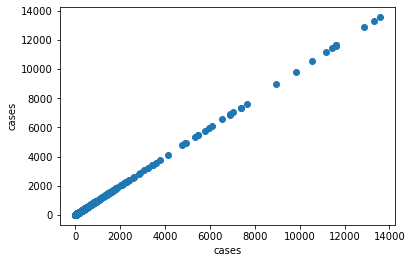

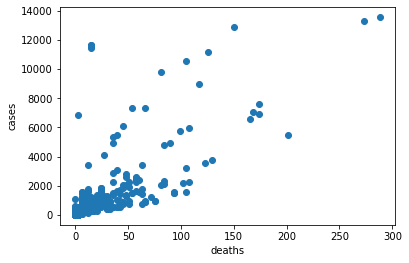

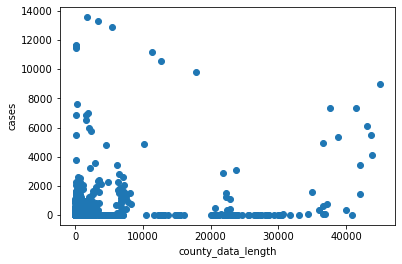

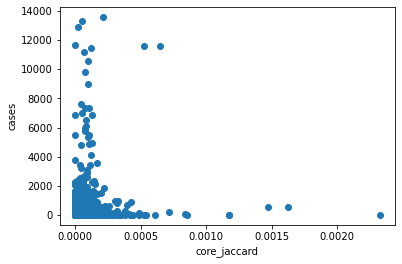

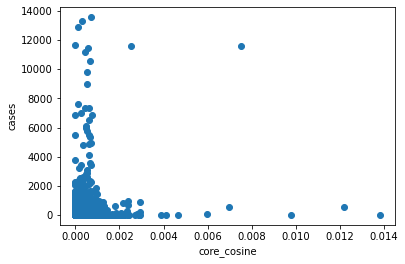

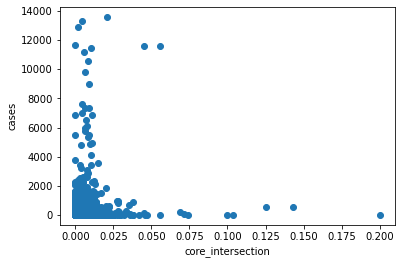

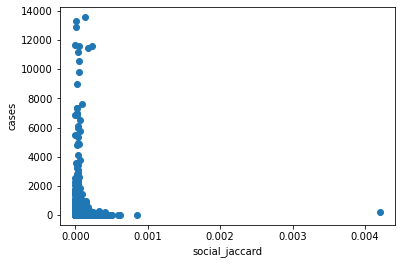

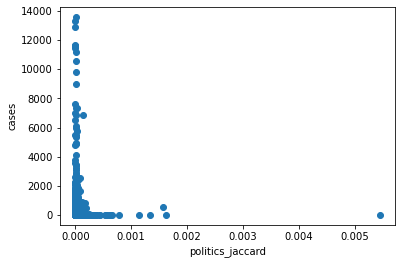

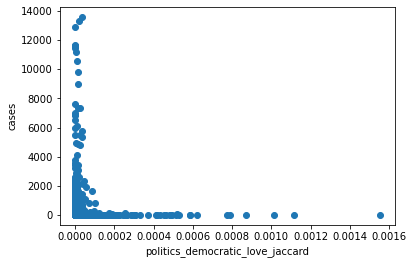

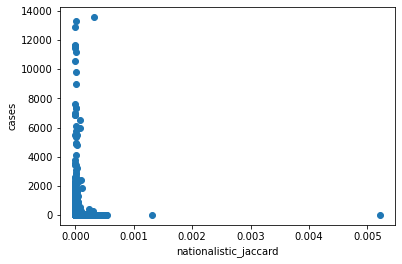

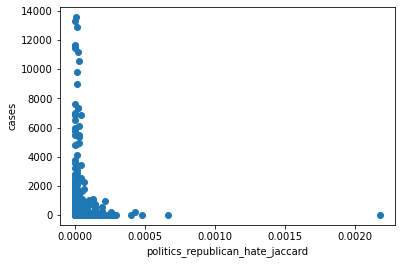

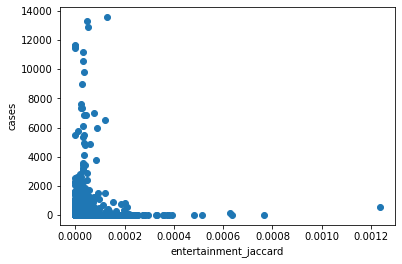

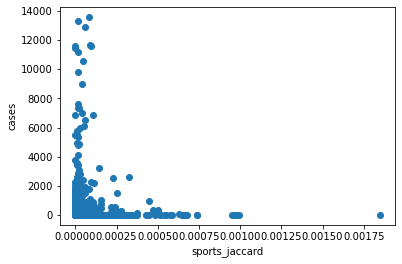

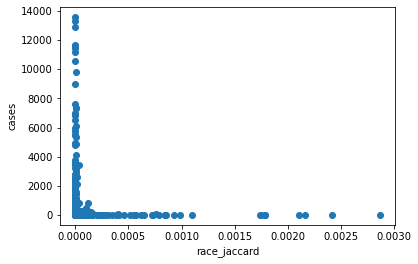

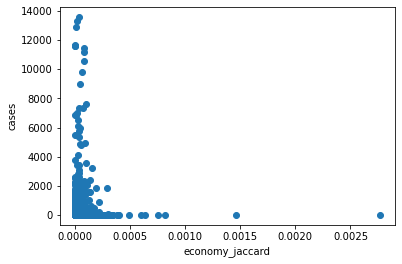

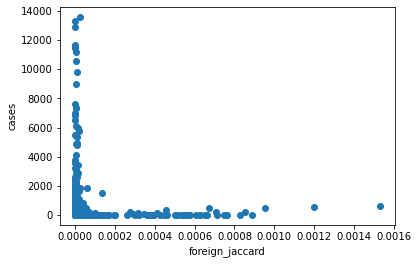

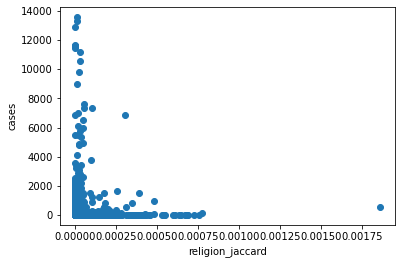

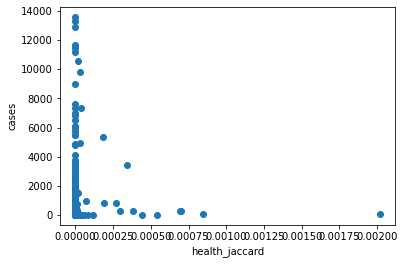

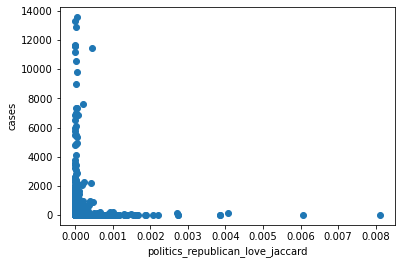

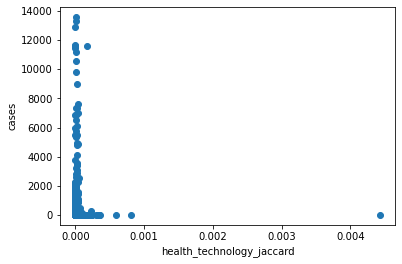

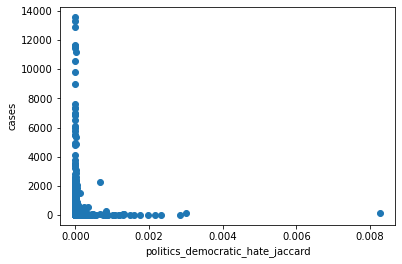

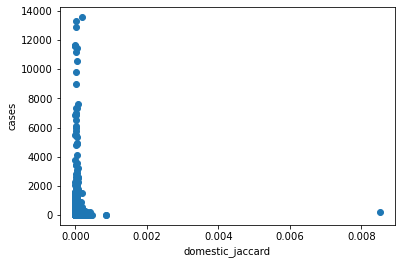

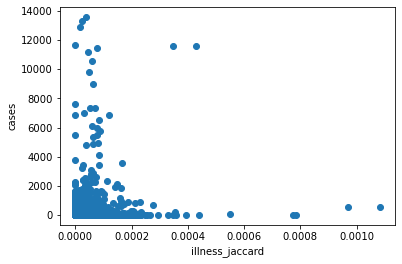

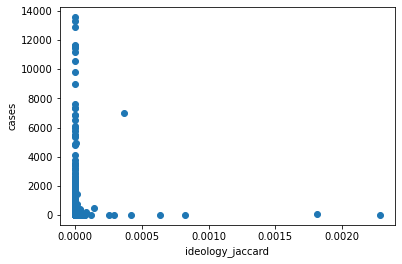

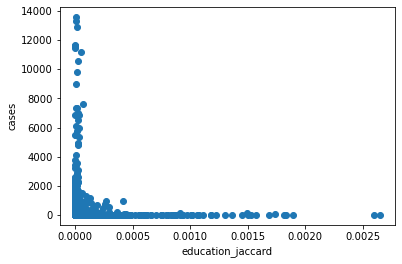

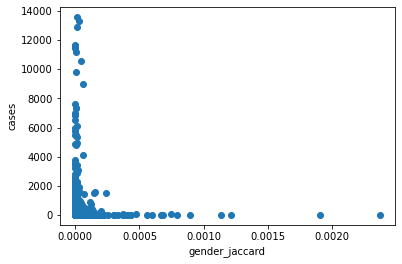

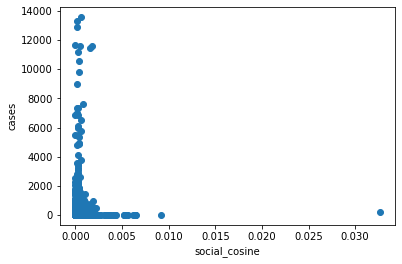

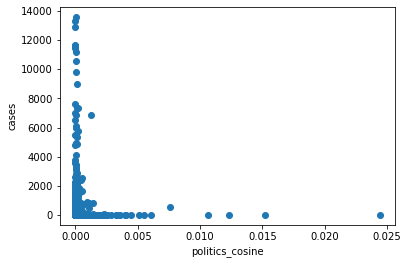

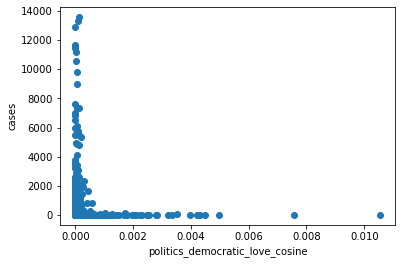

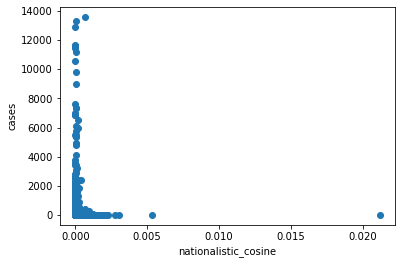

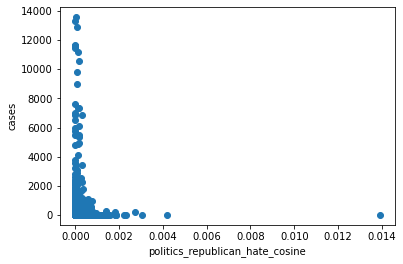

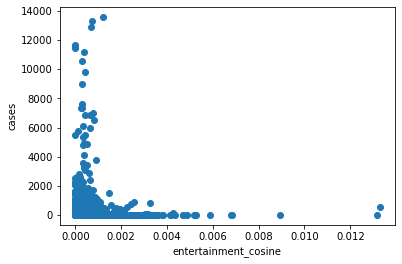

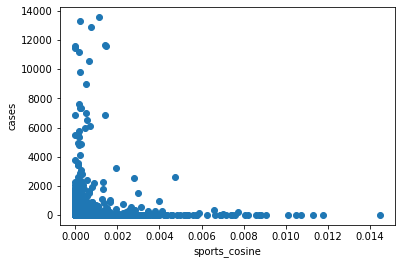

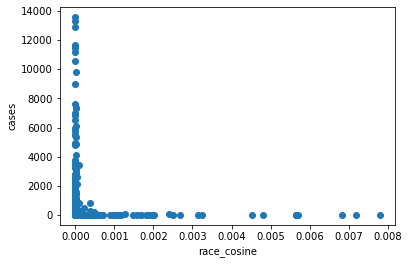

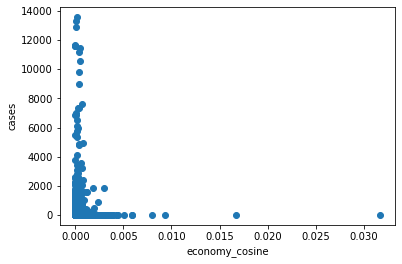

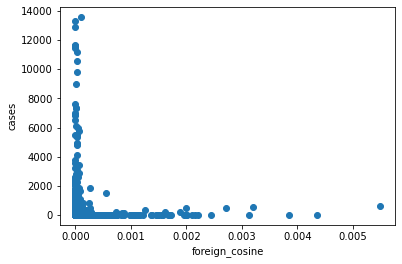

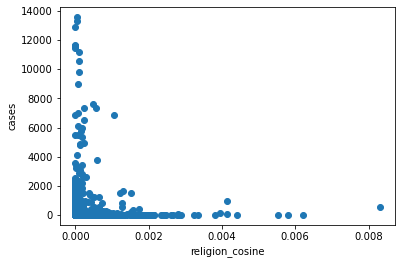

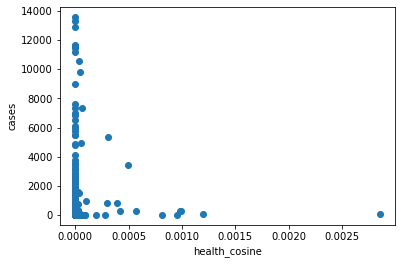

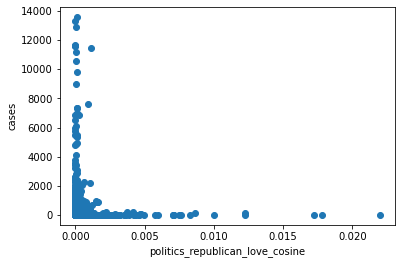

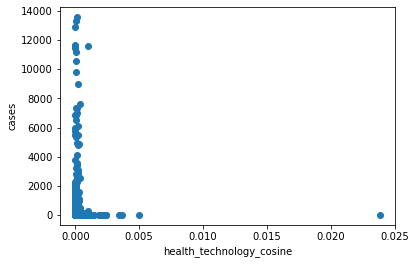

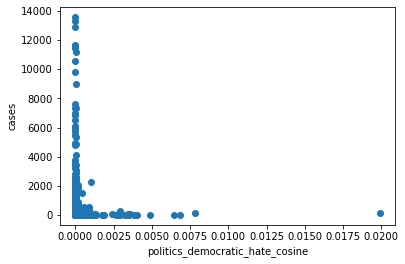

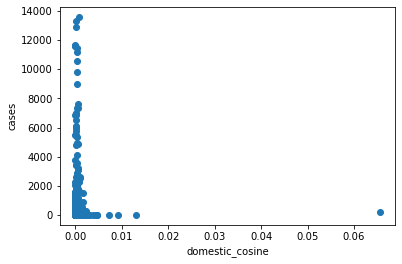

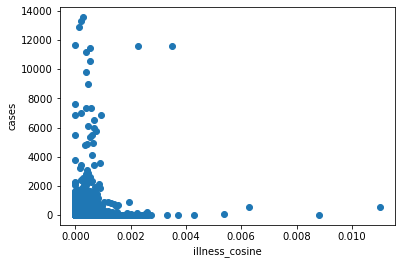

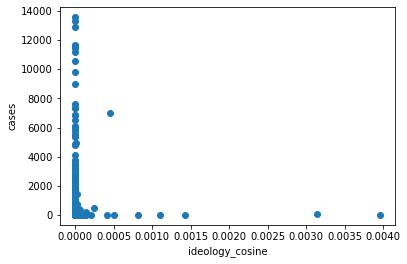

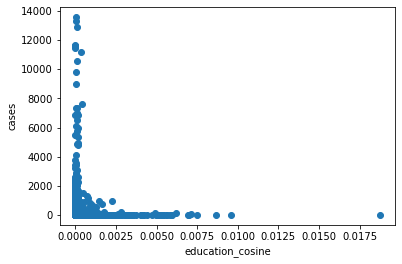

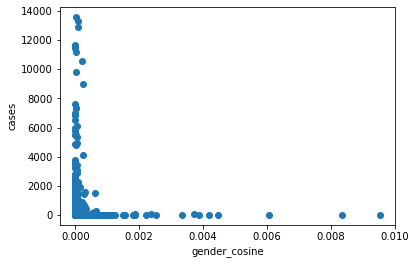

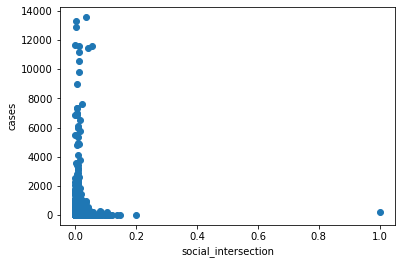

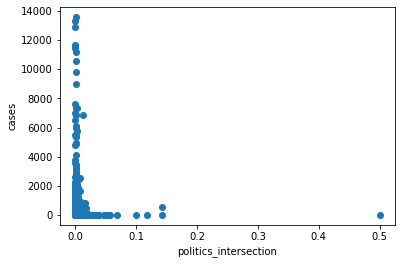

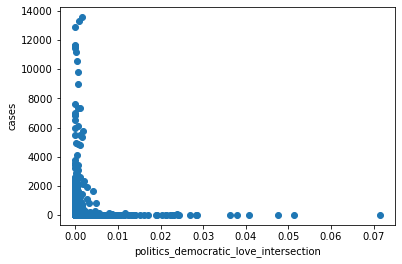

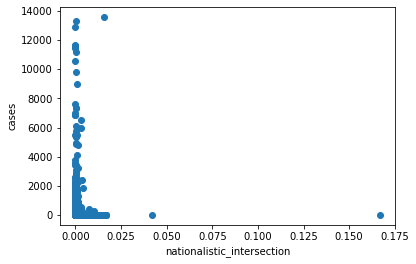

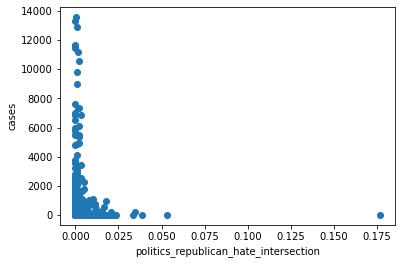

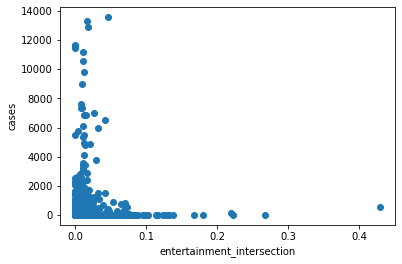

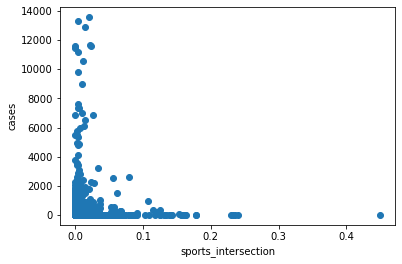

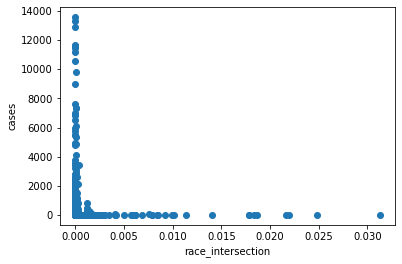

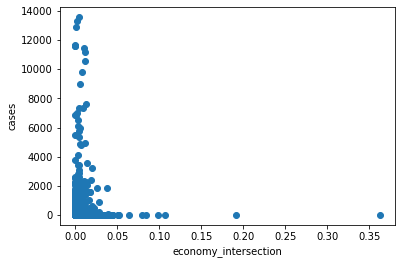

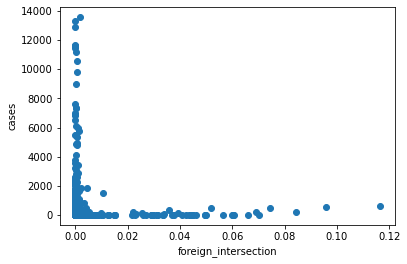

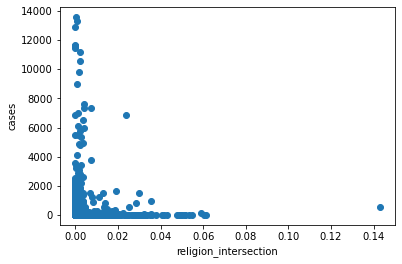

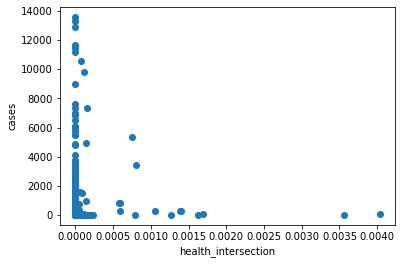

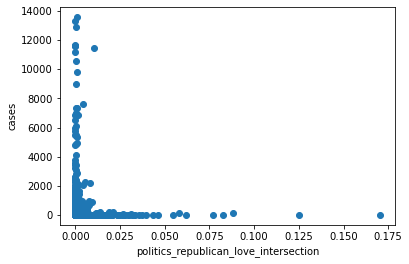

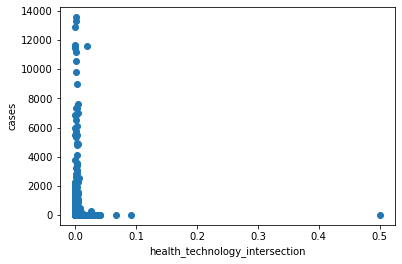

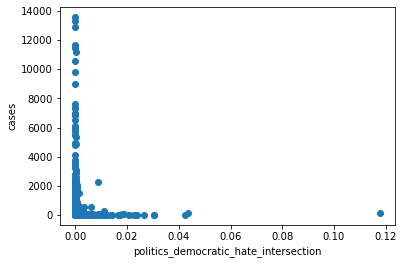

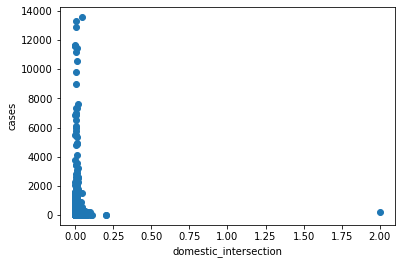

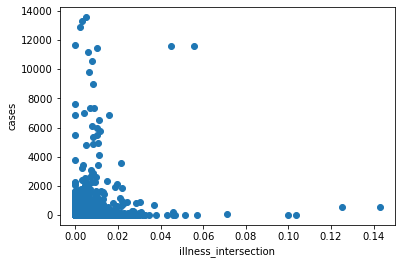

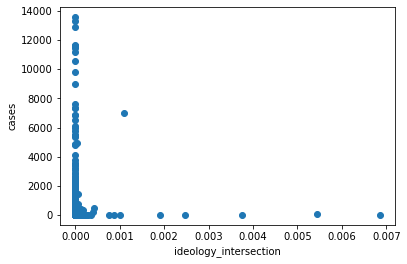

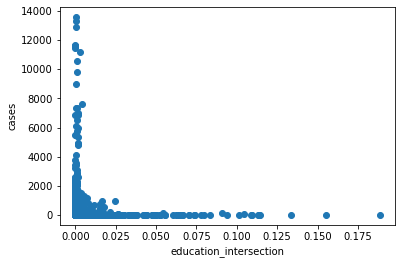

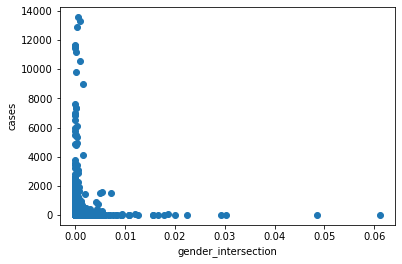

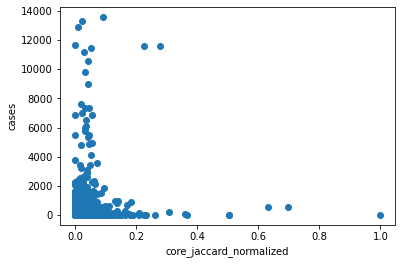

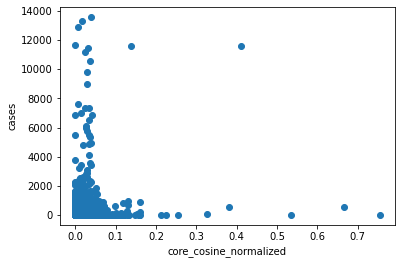

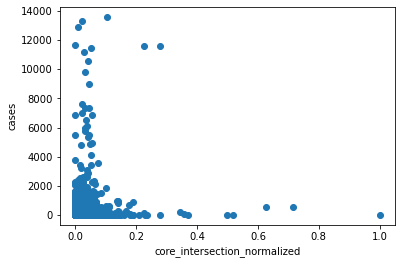

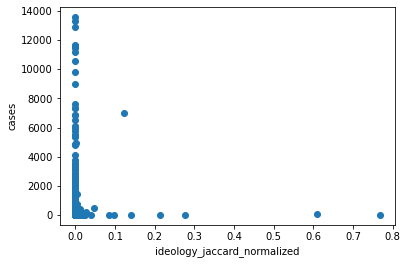

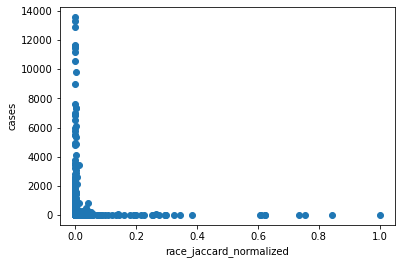

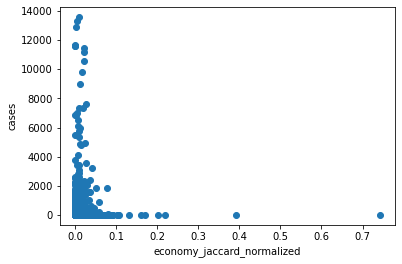

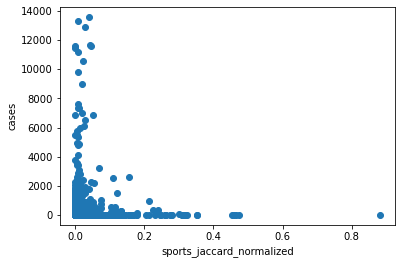

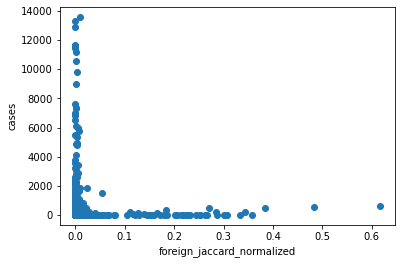

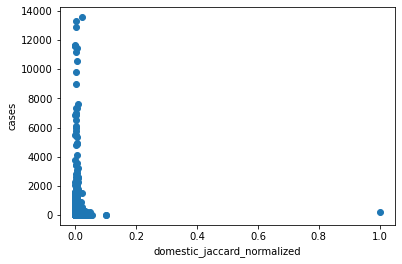

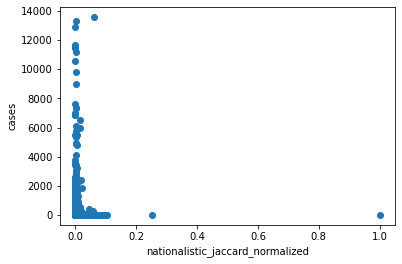

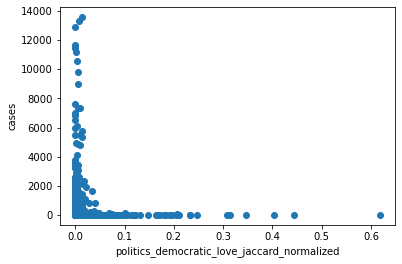

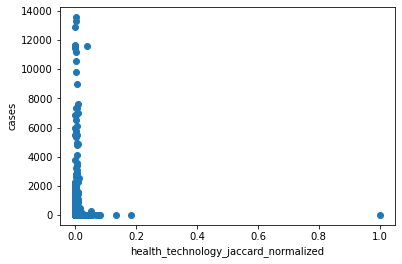

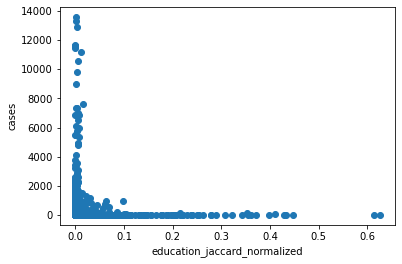

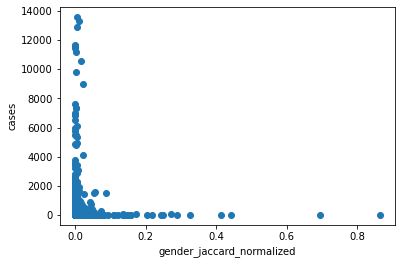

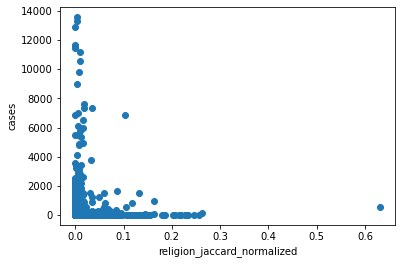

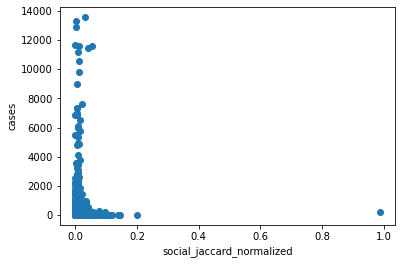

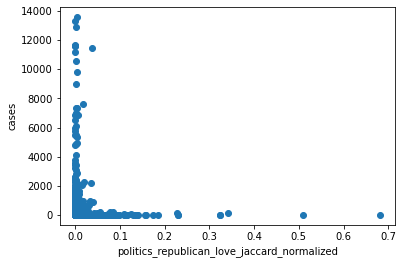

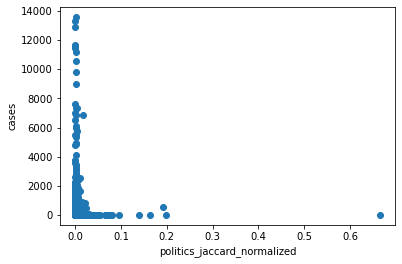

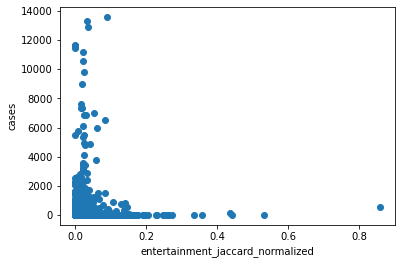

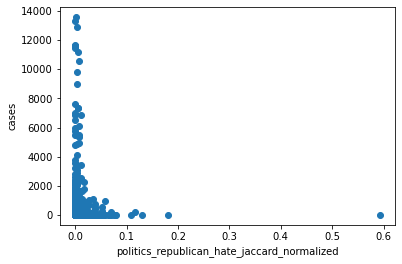

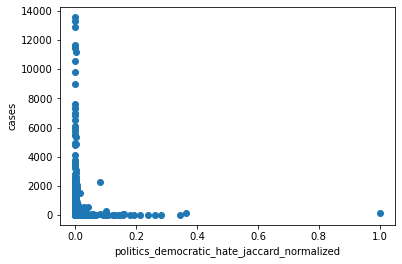

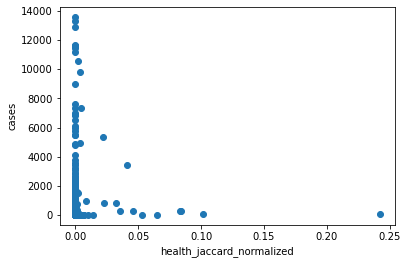

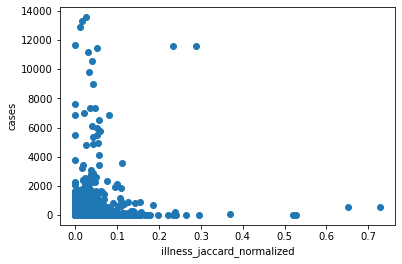

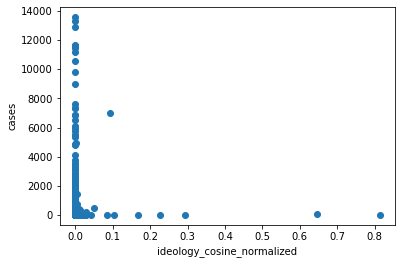

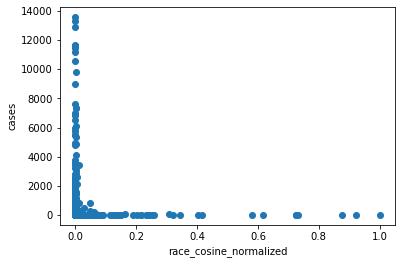

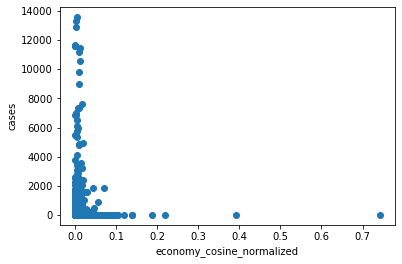

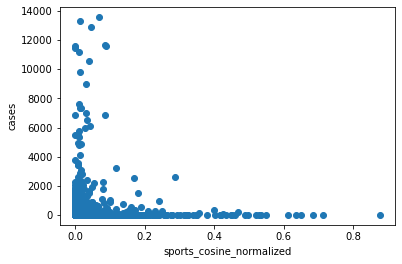

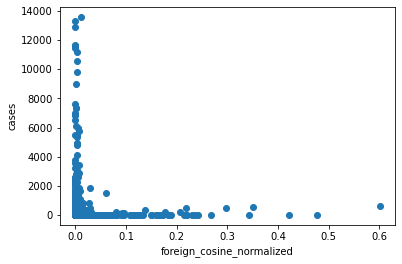

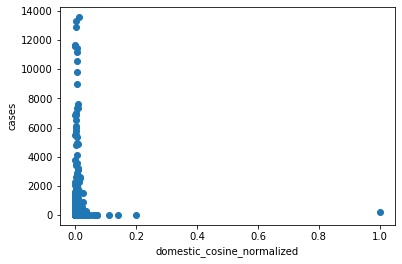

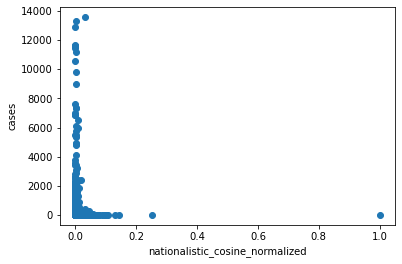

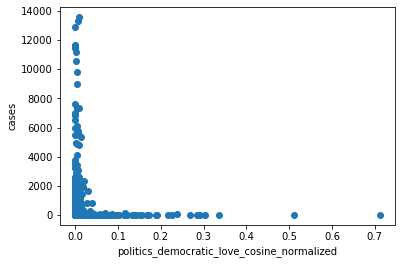

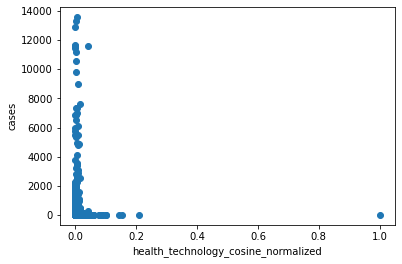

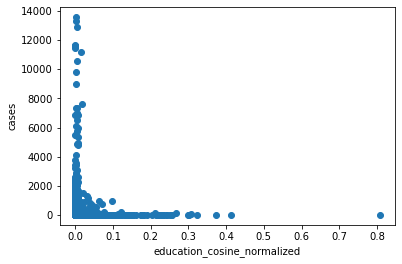

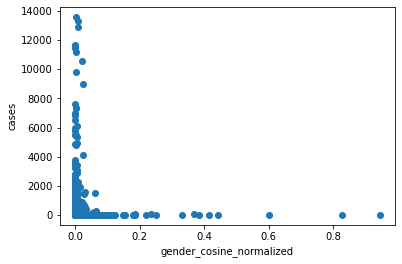

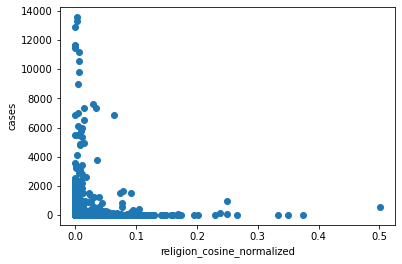

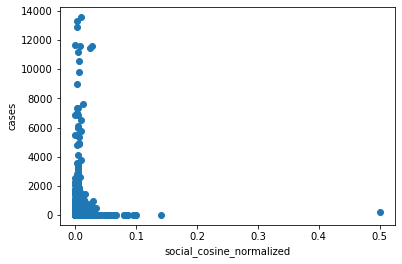

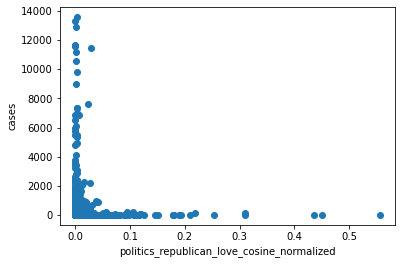

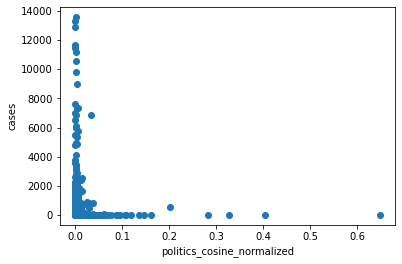

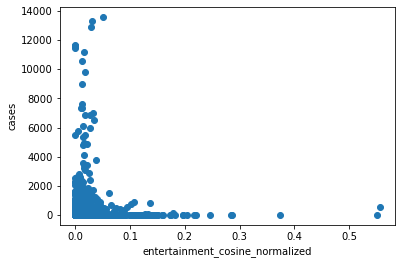

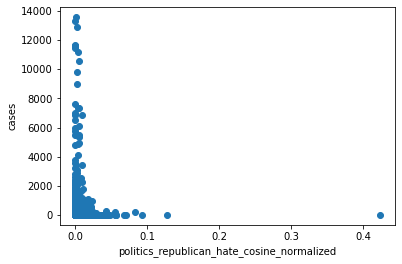

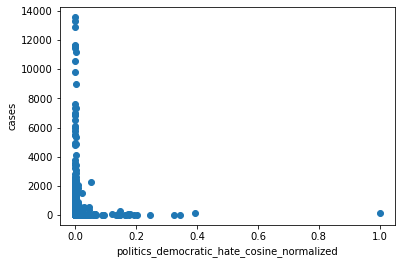

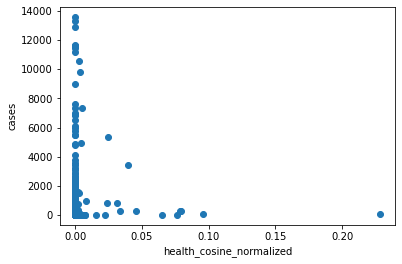

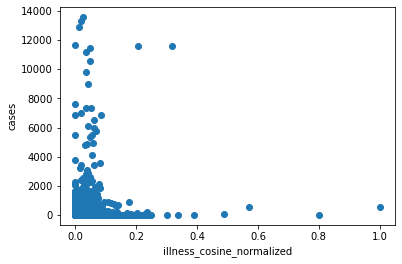

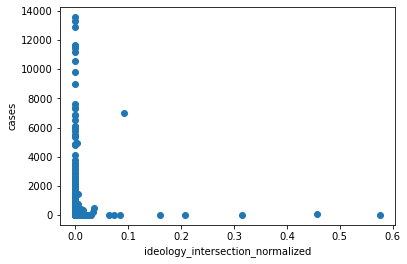

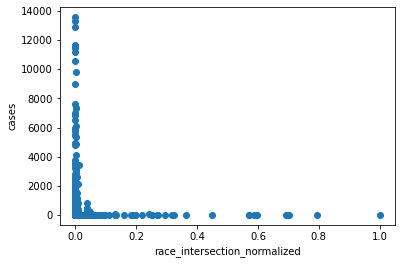

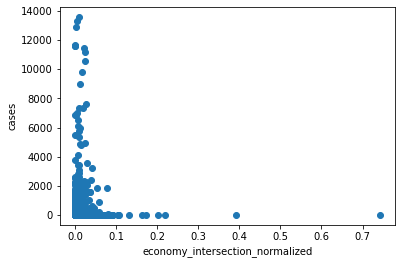

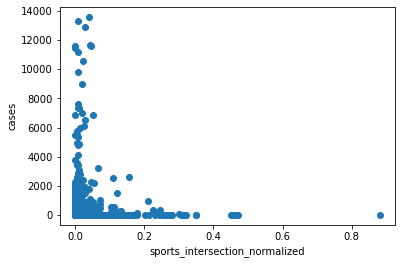

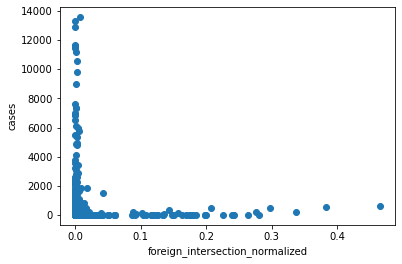

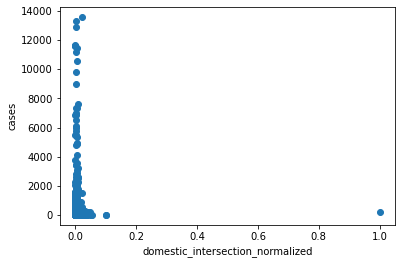

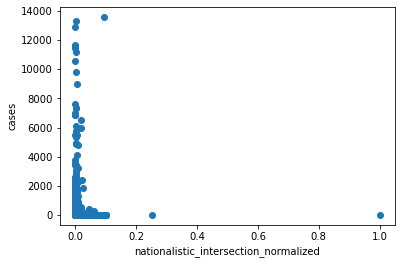

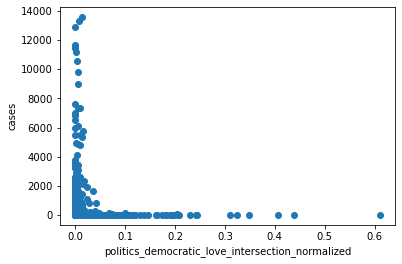

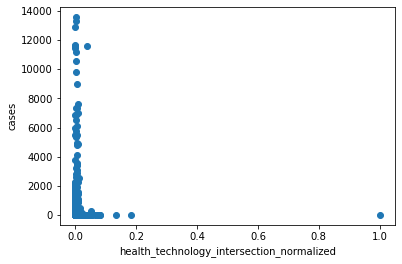

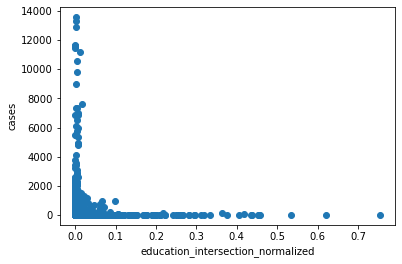

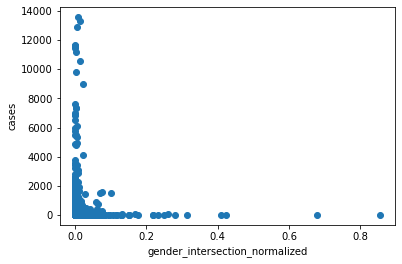

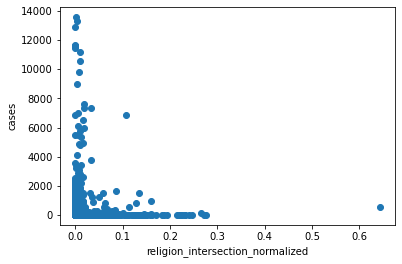

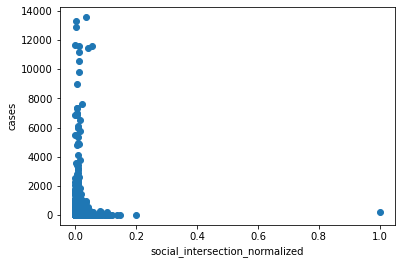

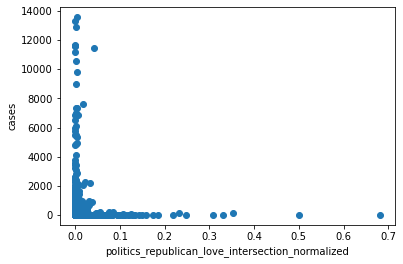

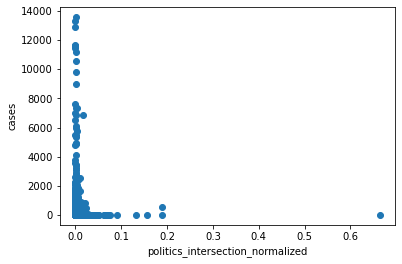

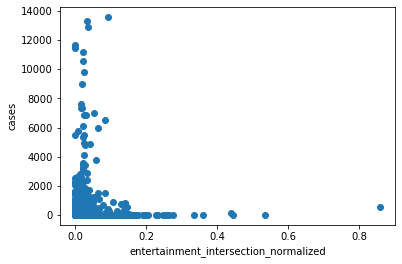

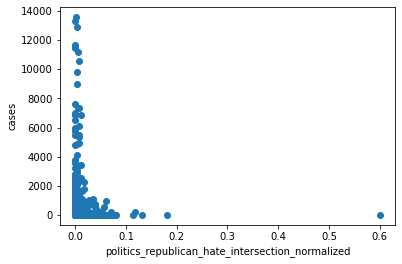

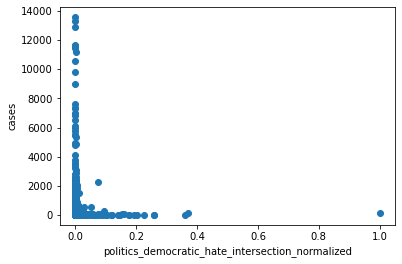

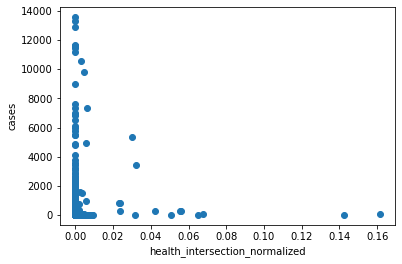

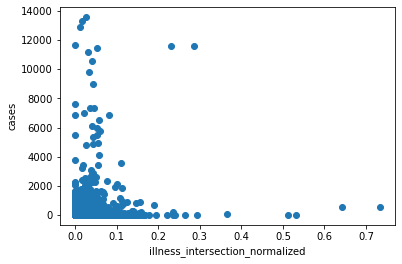

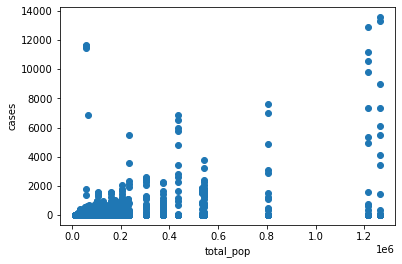

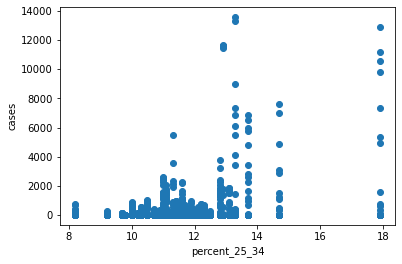

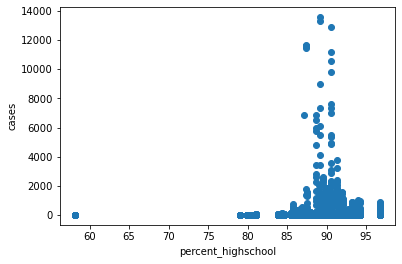

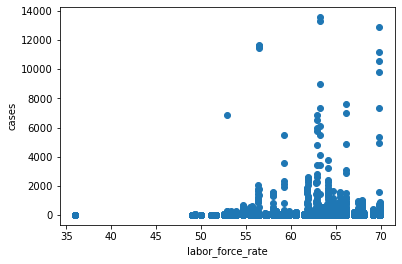

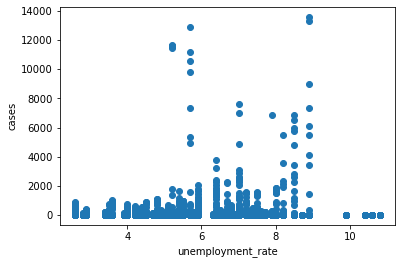

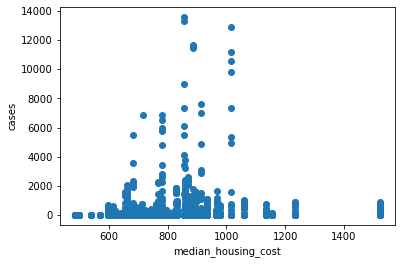

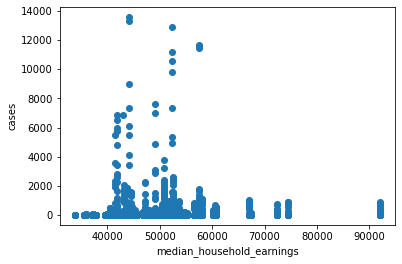

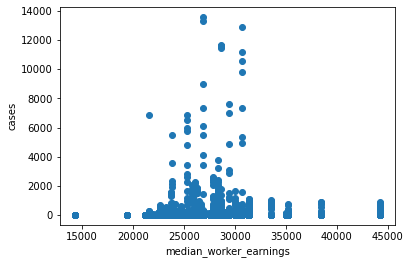

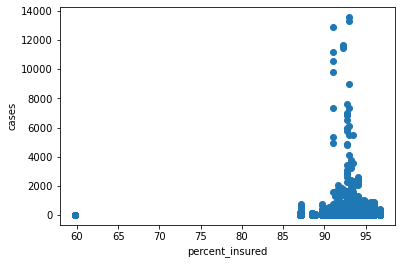

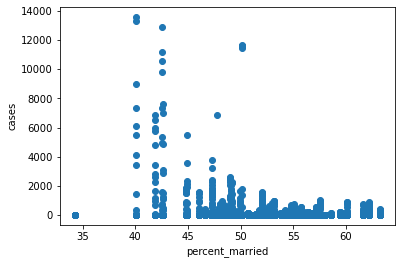

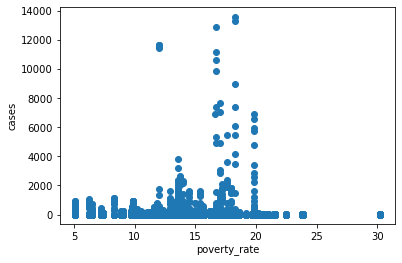

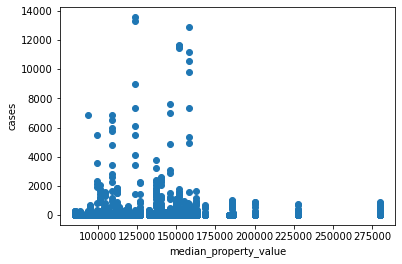

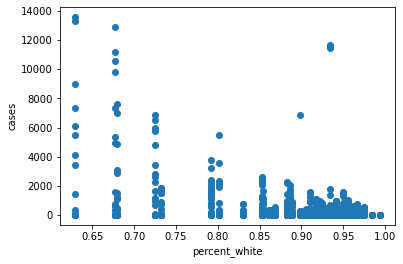

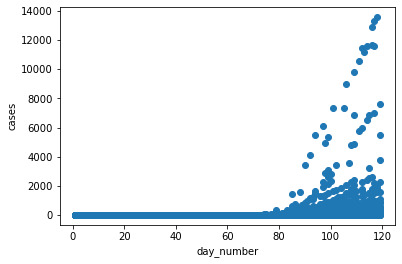

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined_data.csv file into a pandas DataFrame
train_data = pd.read_csv("training_data.csv")

# Extract the day number from 'date_index_converted' and convert it to an integer
train_data['day_number'] = train_data['date_index_converted'].apply(lambda x: int(x.split('_')[1]))

# Drop the original 'date_index_converted' column
train_data = train_data.drop('date_index_converted', axis=1)

# Filter only the numerical columns
numerical_columns = train_data.select_dtypes(include=[np.number]).columns

# Plot a scatter plot for each numerical column against the target variable
for col in numerical_columns:
    plt.scatter(train_data[col], train_data["cases"])
    plt.xlabel(col)
    plt.ylabel("cases")
    plt.show()

Most features clearly did not have any linear relationships

In [180]:
# Impute missing values (just in-case)
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_22248\2697825487.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.fillna(train_data.mean(), inplace=True)
C:\Users\Arunaggiri Pandian\AppData\Local\Temp\ipykernel_22248\2697825487.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_data.fillna(test_data.mean(), inplace=True)


In [181]:
# Drop the 'county' column as it is categorical
train_data = train_data.drop('county', axis=1)

In [182]:
# Get the correlation matrix of the features
correlation_matrix = train_data.corr()

In [183]:
correlation_matrix

,cases,deaths,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,nationalistic_jaccard,...,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white,day_number
cases,1.000000,0.766949,0.244739,0.135154,0.143963,0.136625,0.038168,-0.005572,-0.016234,0.011075,...,0.062575,0.103447,0.025392,0.059998,0.021916,-0.193722,0.031435,0.055807,-0.309937,0.257915
deaths,0.766949,1.000000,0.121341,0.076538,0.064729,0.078907,0.019362,-0.009266,-0.019347,0.011288,...,0.069365,0.072760,0.005074,0.039377,0.029304,-0.176691,0.023355,0.037009,-0.269221,0.286204
county_data_length,0.244739,0.121341,1.000000,0.089615,0.087639,0.089256,0.000652,0.008146,0.019021,0.010167,...,0.155437,0.203261,-0.000969,0.110076,0.023966,-0.435860,0.124872,0.093572,-0.750547,0.012944
core_jaccard,0.135154,0.076538,0.089615,1.000000,0.951399,0.999537,0.174010,0.070124,-0.020416,0.007005,...,0.010264,0.104167,0.069052,0.055330,0.056573,-0.053063,-0.013430,0.074692,-0.091365,0.276030
core_cosine,0.143963,0.064729,0.087639,0.951399,1.000000,0.945573,0.150025,0.046050,-0.020528,0.004447,...,-0.005979,0.108211,0.081280,0.067536,0.058892,-0.037653,-0.024771,0.083101,-0.082975,0.266664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
percent_married,-0.193722,-0.176691,-0.435860,-0.053063,-0.037653,-0.053370,0.040751,0.001694,-0.010580,0.009408,...,-0.677856,0.160635,0.499079,0.489632,-0.061121,1.000000,-0.666754,0.355725,0.605780,-0.021329
poverty_rate,0.031435,0.023355,0.124872,-0.013430,-0.024771,-0.013407,-0.056892,0.008901,0.007453,0.034226,...,0.766492,-0.567093,-0.818164,-0.827516,-0.202341,-0.666754,1.000000,-0.653652,-0.107907,0.014822
median_property_value,0.055807,0.037009,0.093572,0.074692,0.083101,0.074930,0.050433,-0.011857,-0.019305,-0.010249,...,-0.580317,0.909128,0.926366,0.842566,-0.002193,0.355725,-0.653652,1.000000,-0.147318,-0.020976
percent_white,-0.309937,-0.269221,-0.750547,-0.091365,-0.082975,-0.092325,-0.010376,-0.014505,-0.039216,0.000061,...,-0.232069,-0.329543,-0.069523,-0.175498,-0.158871,0.605780,-0.107907,-0.147318,1.000000,0.005871


In [184]:
# Print the correlations with the target -> 'cases'
correlations_with_target = correlation_matrix['cases'].sort_values(ascending=False)
print(correlations_with_target)

cases                           1.000000
deaths                          0.766949
total_pop                       0.337800
day_number                      0.257915
county_data_length              0.244739
                                  ...   
education_intersection         -0.019203
education_jaccard              -0.019263
education_jaccard_normalized   -0.019263
percent_married                -0.193722
percent_white                  -0.309937
Name: cases, Length: 143, dtype: float64


<b> From the correlation map, I am choosing the top features (Top - 4 positively correlated features and top - 2 negatively correlated features).  

<b>Used a lot of trial and error methods before chossing these 6 features

<b>correlation_features = ['deaths', 'total_pop', 'day_number', 'county_data_length', 'percent_25_34', 'percent_married', 'percent_white']

<b>These are the features chosen from this method

In [185]:
from sklearn.ensemble import RandomForestRegressor

# Load the data
train_data = pd.read_csv("training_data.csv")

# Extract the day number from 'date_index_converted' and convert it to an integer
train_data['day_number'] = train_data['date_index_converted'].apply(lambda x: int(x.split('_')[1]))

# Drop the original 'date_index_converted' column
train_data = train_data.drop('date_index_converted', axis=1)

# Drop non-numeric columns
train_data = train_data.select_dtypes(include=['number'])

# Separate target variable and features
X = train_data.drop("cases", axis=1)
y = train_data["cases"]

# Fit the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Sort the features based on their importance and print the top features:

# Sort features by importance
sorted_idx = importances.argsort()[::-1]

# Print top features
for index in sorted_idx:
    print(f"{X.columns[index]}: {importances[index]}")

deaths: 0.5648367340617356
percent_25_34: 0.16197787108923692
percent_white: 0.028868304022935262
total_pop: 0.01984995172574785
poverty_rate: 0.01147726558727916
median_property_value: 0.009096395031847459
percent_married: 0.008102464876727514
county_data_length: 0.007737083778947611
day_number: 0.007644212798530512
unemployment_rate: 0.007324133823393894
median_housing_cost: 0.006726015753564459
median_household_earnings: 0.006697473586164094
gender_jaccard_normalized: 0.006517298795394193
gender_intersection: 0.005564802718530309
gender_intersection_normalized: 0.005009601371955161
religion_intersection: 0.004779136613236592
foreign_cosine_normalized: 0.004486314074197011
illness_cosine: 0.004454941849189512
social_intersection: 0.004421119611821304
entertainment_cosine: 0.004111012858508368
entertainment_jaccard_normalized: 0.0039379377147088284
social_intersection_normalized: 0.003741175467009611
gender_cosine_normalized: 0.0035064565232222522
social_jaccard_normalized: 0.00335667

In [186]:
rfe_features

['poverty_rate',
 'median_property_value',
 'unemployment_rate',
 'median_household_earnings']

<b>Using recursive feature elimination, I found few other features such as,  
    
<b>rfe_features = ['race_jaccard', 'health_jaccard', 'health_technology_jaccard', 'nationalistic_cosine', 'ideology_intersection', 'race_jaccard_normalized', 'health_technology_jaccard_normalized', 'health_jaccard_normalized', 'nationalistic_cosine_normalized', 'ideology_intersection_normalized']  
    
<b>These could be important to the model, but when I trained with those models, the model had a poor R2 value, so I used Random Forest to find the feature importance of each feature to the target, to find the few other features other than the features selected from correlation method, using trial and error and the above 4 features in the variable "rfe_features" are the chosen ones.

In [187]:
from sklearn.ensemble import RandomForestRegressor

# Combine the features from both lists
selected_features = correlation_features + rfe_features

# Create the input dataset with the selected features
X_selected = X[selected_features]

# Fit a Random Forest model on the input data
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_selected, y)

# Get the feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame with the feature names and their importances
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)

                      Feature  Importance
0                      deaths    0.579370
4               percent_25_34    0.179133
3          county_data_length    0.050723
1                   total_pop    0.048682
6               percent_white    0.040987
8       median_property_value    0.023593
2                  day_number    0.020357
10  median_household_earnings    0.019772
5             percent_married    0.018182
7                poverty_rate    0.010848
9           unemployment_rate    0.008354


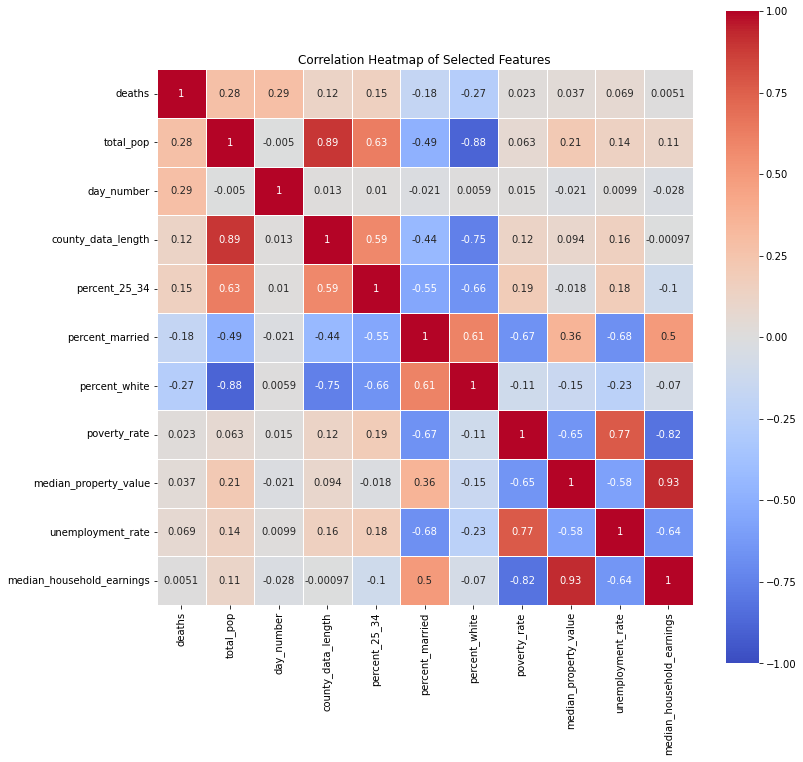

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the selected features
X_selected_df = X[selected_features]

# Compute the correlation matrix
corr_matrix = X_selected_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

<b> I have used standard scaler to scale both the train and test data.  
<b> A new feature called day_number has been created by extracting the number from the date_index_converted column.

In [189]:
from sklearn.preprocessing import StandardScaler

# Load your data
train_data = pd.read_csv("training_data.csv")

# Extract the day number from 'date_index_converted' and convert it to an integer
train_data['day_number'] = train_data['date_index_converted'].apply(lambda x: int(x.split('_')[1]))

# Drop the original 'date_index_converted' column
train_data = train_data.drop('date_index_converted', axis=1)

# Drop non-numeric columns
train_data = train_data.select_dtypes(include=['number'])

# Separate target variable and features
X = train_data.drop("cases", axis=1)
y = train_data["cases"]

# Features from correlation map
correlation_features = ['deaths', 'total_pop', 'day_number', 'county_data_length', 'percent_25_34', 'percent_married', 'percent_white']

# Features from RFE (Random Forest)
rfe_features = ['poverty_rate', 'median_property_value', 'unemployment_rate', 'median_household_earnings']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Combine the features from both methods
combined_features = list(set(correlation_features + rfe_features))

# Train and evaluate the models with the combined features
X_train_combined = X_train[combined_features]
X_test_combined = X_test[combined_features]

# Create the scaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train_combined)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

<b> Used four different models to train the data and test it

In [190]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)
lr_r2_score = r2_score(y_test, lr_preds)
print("Linear Regression R2 Score:", lr_r2_score)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_preds = dt_model.predict(X_test_scaled)
dt_r2_score = r2_score(y_test, dt_preds)
print("Decision Tree R2 Score:", dt_r2_score)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)
rf_r2_score = r2_score(y_test, rf_preds)
print("Random Forest R2 Score:", rf_r2_score)

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)
xgb_r2_score = r2_score(y_test, xgb_preds)
print("XGBoost R2 Score:", xgb_r2_score)

# Create a dictionary with the R2 scores
r2_scores_dict = {
    'Linear Regression': lr_r2_score,
    'Decision Tree': dt_r2_score,
    'Random Forest': rf_r2_score,
    'XGBoost': xgb_r2_score
}

Linear Regression R2 Score: 0.47596377481351815
Decision Tree R2 Score: 0.9802072894293665
Random Forest R2 Score: 0.8883435004558167
XGBoost R2 Score: 0.9746525504195852


In [191]:
# Convert the dictionary to a DataFrame
r2_scores_df = pd.DataFrame(list(r2_scores_dict.items()), columns=['Model', 'R2 Score'])

# Display the DataFrame
r2_scores_df

,Model,R2 Score
0,Linear Regression,0.475964
1,Decision Tree,0.980207
2,Random Forest,0.888344
3,XGBoost,0.974653


<b> Since the decision tree model performed well used decision tree model on the test set, it is obvious that my decision tree model performed well because, very few features had a linear relationship with the target, so I knew none of the linear models would give me the desired result. As, decision tree is based is a non-linear model it gave me the desired result.

In [192]:
# Preprocess the test_data
test_data = pd.read_csv('test_data.csv')

# Extract the day number from 'date_index_converted' and convert it to an integer
test_data['day_number'] = test_data['date_index_converted'].apply(lambda x: int(x.split('_')[1]))

# Drop the original 'date_index_converted' column
test_data = test_data.drop('date_index_converted', axis=1)

test_data_combined = test_data[combined_features]

# Scale the test_data
test_data_scaled = scaler.transform(test_data_combined)

# Make predictions using the DT model
predictions = dt_model.predict(test_data_scaled)

In [193]:
# Create the submission DataFrame
submission = pd.DataFrame({'index': test_data['index'], 'cases': predictions})

# Convert the 'cases' column from float to integer
submission['cases'] = submission['cases'].astype(int)

In [194]:
# Get the unique integer values from the 'cases' column
unique_cases = submission['cases'].unique()

# Find unique cases in the submission
unique_cases = submission['cases'].unique()

# get the count of unique values in the 'cases' column
unique_cases = submission['cases'].nunique()  
print("Number of unique cases:", unique_cases)

Number of unique cases: 155


In [195]:
# # Save the submission DataFrame as a CSV file
submission.to_csv('Method-1_Predictions.csv', index=False)
print("success")

success


The submission score that we received for it was --> <b>0.92584 

# Method - 2

# Importing the libraries and loading the two datasets

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_data = pd.read_csv("training_data.csv")
test_data=pd.read_csv("test_data.csv")

Merging the two datasets

In [ ]:
df=pd.concat([train_data,test_data], ignore_index=True)

In [ ]:
df

,county,cases,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,...,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white,index
0,Richland,0.0,0,day_10,363,0.000000,0.00000,0.000000,0.000011,0.000151,...,7.5,675,41877,23210,90.5,48.3,15.6,103700,0.868085,NaN
1,Lawrence,119.0,0,day_105,256,0.000000,0.00000,0.000000,0.000000,0.000000,...,6.5,655,42874,23510,92.2,49.3,18.6,101500,0.954027,NaN
2,Wayne,49.0,0,day_90,769,0.000076,0.00037,0.006502,0.000039,0.000000,...,4.0,762,50383,26658,87.2,55.1,13.0,140100,0.950541,NaN
3,Fayette,7.0,0,day_85,36,0.000000,0.00000,0.000000,0.000000,0.000000,...,6.3,732,40503,25858,91.3,51.8,17.7,108900,0.940054,NaN
4,Trumbull,0.0,0,day_7,554,0.000000,0.00000,0.000000,0.000046,0.000000,...,5.9,661,43073,25800,91.7,49.1,17.2,101600,0.885724,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10467,Meigs,NaN,0,day_51,24,0.000000,0.00000,0.000000,0.000000,0.000473,...,10.4,571,37813,21714,91.7,51.9,22.5,87400,0.974262,7326.0
10468,Knox,NaN,3,day_109,128,0.000000,0.00000,0.000000,0.000033,0.000000,...,5.8,784,48533,24568,89.9,51.7,13.8,138900,0.965641,7327.0
10469,Columbiana,NaN,0,day_37,194,0.000000,0.00000,0.000000,0.000043,0.000000,...,7.5,656,44497,23781,91.3,52.0,15.4,104300,0.949782,7328.0
10470,Ashtabula,NaN,21,day_114,139,0.000000,0.00000,0.000000,0.000000,0.000000,...,7.4,695,40544,23117,90.0,47.9,19.8,106300,0.929083,7329.0


In this method, we want to explore the relationship between the county, cases and days

In [ ]:
df1=df[["cases","date_index_converted","deaths","county"]]

In [48]:
#We need to convert the date into the integer column with just the day number
df1['day_number'] = df1['date_index_converted'].apply(lambda x: int(x.split('_')[1]))

In [ ]:
df1

,cases,date_index_converted,deaths,county,day_number
1725,0.0,day_1,0,Brown,1
3130,0.0,day_1,0,Butler,1
575,0.0,day_1,0,Huron,1
1285,0.0,day_1,0,Auglaize,1
576,0.0,day_1,0,Hamilton,1
...,...,...,...,...,...
9327,NaN,day_119,12,Marion,119
362,917.0,day_119,33,Warren,119
598,21.0,day_119,0,Vinton,119
3159,NaN,day_119,3,Williams,119


In [ ]:
df1["county"].unique()

array(['Brown', 'Butler', 'Huron', 'Auglaize', 'Hamilton', 'Wood',
       'Fulton', 'Jefferson', 'Seneca', 'Fayette', 'Warren', 'Lake',
       'Muskingum', 'Putnam', 'Guernsey', 'Clermont', 'Mahoning',
       'Marion', 'Hancock', 'Preble', 'Cuyahoga', 'Lucas', 'Knox',
       'Clark', 'Erie', 'Union', 'Williams', 'Morrow', 'Perry', 'Miami',
       'Adams', 'Madison', 'Clinton', 'Medina', 'Delaware', 'Richland',
       'Allen', 'Ashtabula', 'Pickaway', 'Montgomery', 'Columbiana',
       'Franklin', 'Wyandot', 'Vinton', 'Holmes', 'Pike', 'Hocking',
       'Tuscarawas', 'Scioto', 'Meigs', 'Lawrence', 'Monroe', 'Logan',
       'Highland', 'Belmont', 'Defiance', 'Geauga', 'Mercer', 'Hardin',
       'Ross', 'Greene', 'Noble', 'Portage', 'Carroll', 'Van Wert',
       'Trumbull', 'Lorain', 'Ashland', 'Sandusky', 'Fairfield',
       'Harrison', 'Gallia', 'Paulding', 'Shelby', 'Morgan', 'Wayne',
       'Henry', 'Coshocton', 'Summit', 'Crawford', 'Athens', 'Licking',
       'Jackson', 'Ottawa', 'D

In [ ]:
max(df1["cases"])

13566.0

In [49]:
#We find the counties that have 0 cases till day 100 
df.loc[(df["cases"]== 0) &(df["date_index_converted"]== "day_100")]

,county,cases,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,...,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white,index
654,Hocking,0.0,0,day_100,20,0.000000,0.000000,0.000000,0.000000,0.0,...,7.4,653,42170,24166,91.5,54.9,14.2,118400,0.970820,NaN
1549,Vinton,0.0,0,day_100,5,0.002326,0.013801,0.200000,0.000847,0.0,...,10.6,618,40680,22094,91.1,49.0,21.1,85700,0.973292,NaN
2894,Harrison,0.0,0,day_100,107,0.000215,0.001824,0.018692,0.000040,0.0,...,4.9,617,43173,24204,91.0,58.0,15.7,88600,0.959278,NaN


In [ ]:
df1

,cases,date_index_converted,deaths,county,day_number
1725,0.0,day_1,0,Brown,1
3130,0.0,day_1,0,Butler,1
575,0.0,day_1,0,Huron,1
1285,0.0,day_1,0,Auglaize,1
576,0.0,day_1,0,Hamilton,1
...,...,...,...,...,...
9327,NaN,day_119,12,Marion,119
362,917.0,day_119,33,Warren,119
598,21.0,day_119,0,Vinton,119
3159,NaN,day_119,3,Williams,119


In [50]:
#sorting the data county and day wise
df1=df1.sort_values(by=["county","day_number"])

Here we find that all the counties have cases 0 till day 70 so we are imputing all the null values till day 70 with 0

In [51]:
df1.loc[(df1["cases"].isnull()) & (df1["day_number"] <=70), "cases"]= 0 

In [52]:
df1

,cases,date_index_converted,deaths,county,day_number
5231,0.000000,day_1,0,Adams,1
4176,0.000000,day_2,0,Adams,2
120,0.000000,day_3,0,Adams,3
9623,0.000000,day_4,0,Adams,4
9912,0.000000,day_5,0,Adams,5
...,...,...,...,...,...
6699,14.234539,day_115,6,Wyandot,115
4633,45.886842,day_116,6,Wyandot,116
9452,272.223506,day_117,6,Wyandot,117
9479,69.659040,day_118,6,Wyandot,118


We are creating 4 new columns for forward and back filling values of cases and for the days that have known value of cases 

In [ ]:
df1["for_fill_cases"]= df1["cases"]
df1["back_fill_cases"]=df1["cases"]
df1["days"]=df1.loc[df1["cases"].notnull(),"day_number"]
df1["for_fill_days"]= df1["days"]
df1["back_fill_days"]=df1["days"]

In [ ]:
df1["for_fill_cases"].fillna(method= "ffill", inplace=True)
df1["back_fill_cases"].fillna(method= "backfill", inplace=True)

In [ ]:
df1["for_fill_days"].fillna(method= "ffill", inplace=True)
df1["back_fill_days"].fillna(method= "backfill", inplace=True)

In [ ]:
df1

,cases,date_index_converted,deaths,county,day_number,for_fill_cases,back_fill_cases,days,for_fill_days,back_fill_days
5231,0.0,day_1,0,Adams,1,0.0,0.0,1.0,1.0,1.0
4176,0.0,day_2,0,Adams,2,0.0,0.0,2.0,2.0,2.0
120,0.0,day_3,0,Adams,3,0.0,0.0,3.0,3.0,3.0
9623,0.0,day_4,0,Adams,4,0.0,0.0,4.0,4.0,4.0
9912,0.0,day_5,0,Adams,5,0.0,0.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...
6699,NaN,day_115,6,Wyandot,115,147.0,168.0,NaN,113.0,119.0
4633,NaN,day_116,6,Wyandot,116,147.0,168.0,NaN,113.0,119.0
9452,NaN,day_117,6,Wyandot,117,147.0,168.0,NaN,113.0,119.0
9479,NaN,day_118,6,Wyandot,118,147.0,168.0,NaN,113.0,119.0


Now , we are finding the regression slope using forward fill and backward fill using the known values of cases and the corresponding days. However, where the value of cases is present, the slope would be infinite or NAN, so we are imputing it with 0 as at those points the slope would be a straight line

In [ ]:
df1["slope"]= (df1["back_fill_cases"]-df1["for_fill_cases"])/ (df1["back_fill_days"] - df1["for_fill_days"])

In [ ]:
df1["slope"].fillna(0, inplace=True)

For predicting the values, we are using formula y=mx+c, where m is the slope, x is the difference between the day numbers b etween which the slope is plotted and c is the value of the last known case value

In [ ]:
df1["pred_cases"]= df1["slope"]* (df1["day_number"]- df1["for_fill_days"]) + df1["for_fill_cases"]

Since we observed that all the cases are multiples of 7, we are rounding off the cases to the nearest multiple of 7

In [ ]:
df1["pred_cases"]=round(df1["pred_cases"]/7)*7

In the next few steps, we have dropped all the other columns thta are not required in the submission, sorted the index and separated the test data from df1 with the predictions. After that, we have just prepared the submission file and downloaded it in csv format. 

In [ ]:
df1.columns

Index(['cases', 'date_index_converted', 'deaths', 'county', 'day_number',
       'for_fill_cases', 'back_fill_cases', 'days', 'for_fill_days',
       'back_fill_days', 'slope', 'pred_cases'],
      dtype='object')

In [ ]:
df1=df1.drop(['date_index_converted', 'deaths','for_fill_cases', 'back_fill_cases', 'days', 'for_fill_days',
       'back_fill_days', 'slope'], axis=1)

In [ ]:
df1=df1.sort_index()

In [ ]:
dub=df1[3141:]

In [ ]:
dub=dub.drop(["cases","date_index_converted","deaths","county","day_number","for_fill_cases","back_fill_cases","slope"],axis=1)

In [ ]:
dub=dub.drop(["days","for_fill_days","back_fill_days"], axis=1)

In [ ]:
dub=dub.reset_index(drop=True)

In [ ]:
dub["pred_cases"]=dub["pred_cases"].astype(int)

In [ ]:
dub

,pred_cases
0,0
1,546
2,0
3,0
4,0
...,...
7326,0
7327,84
7328,0
7329,497


In [ ]:
dub.reset_index(inplace=True)

In [ ]:
dub=dub.rename(columns={"pred_cases":"cases"})

In [ ]:
dub.to_csv("sub_rule.csv",index=False)

In [ ]:
dubb

,index,cases
0,0,0
1,1,546
2,2,0
3,3,0
4,4,0
...,...,...
7326,7326,0
7327,7327,84
7328,7328,0
7329,7329,497


The submission score that we received for it was --> <b>0.92714

## Part - I

### Descriptive Part

### (A)
(i)Ohio had both similarities and differences from the other states. Similarities include, the surge of cases in the spring of 2020 like other states. However, it was not as hard hit by the pandemic like other states like New York or California. Ohio also had stricter regulations for masks and social distancing whereas some states had relaxed the rules to some extent. Also, Ohio had a lot of protests against the government’s way of handling the pandemic. 

(ii) Though there were a lot of minor policy changes during the pandemic, the major ones were as following:
March 3, 2020: DeWine cancelled Arnold Classic even before and confirmed cases
March 5, 2020: A summit was help on Covid-19 preparedness for health officials. 
March 9, 2020: A state of emergency was declared at just 3 cases
March 12, 2020: All the schools from K-12 were shut for 3 weeks and banned gathering of more than 100 people 
March 15 and 16, 2020: All the bars and restaurants were ordered to close after 9:00 pm and gathering of more than 50 was banned
March 22, 2020: DeWine issued a "stay-at-home" order 
April 16, 2020: DeWine announced a "reopening" plan for Ohio, with certain businesses allowed to reopen on May 1 if they met certain criteria

(iii) The Wikipedia surely doesn’t think that Ohio dealt with Covid-19 successfully as it had a heavy impact on sectors like education, public transport, prison and restaurant industry. They have also criticized the government response on Covid-19. There were multiple protests throughout the Covid period criticizing DEWine’s policies. However, there is differing opinions as a few media channels also praised the governor’s early and immediate action on the pandemic. 



### (B)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv("training_data.csv")
train_data

,county,cases,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,...,labor_force_rate,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white
0,Richland,0,0,day_10,363,0.000000,0.000000,0.000000,0.000011,0.000151,...,55.5,7.5,675,41877,23210,90.5,48.3,15.6,103700,0.868085
1,Lawrence,119,0,day_105,256,0.000000,0.000000,0.000000,0.000000,0.000000,...,53.5,6.5,655,42874,23510,92.2,49.3,18.6,101500,0.954027
2,Wayne,49,0,day_90,769,0.000076,0.000370,0.006502,0.000039,0.000000,...,64.0,4.0,762,50383,26658,87.2,55.1,13.0,140100,0.950541
3,Fayette,7,0,day_85,36,0.000000,0.000000,0.000000,0.000000,0.000000,...,59.3,6.3,732,40503,25858,91.3,51.8,17.7,108900,0.940054
4,Trumbull,0,0,day_7,554,0.000000,0.000000,0.000000,0.000046,0.000000,...,56.4,5.9,661,43073,25800,91.7,49.1,17.2,101600,0.885724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Summit,105,0,day_81,6121,0.000094,0.000491,0.008169,0.000041,0.000011,...,64.2,6.4,859,50765,28345,93.2,47.3,13.6,137000,0.791435
3137,Fayette,0,0,day_55,28,0.000000,0.000000,0.000000,0.000000,0.000000,...,59.3,6.3,732,40503,25858,91.3,51.8,17.7,108900,0.940054
3138,Clark,147,0,day_106,929,0.000013,0.000105,0.001076,0.000009,0.000012,...,60.6,7.7,736,43625,25300,92.7,48.1,16.6,107300,0.865754
3139,Logan,0,0,day_1,144,0.000000,0.000000,0.000000,0.000000,0.000000,...,62.5,5.8,766,49783,28346,90.7,55.2,13.7,127200,0.949363


In [4]:
# Select normalized Jaccard similarity-based awareness columns
jaccard_normalized_columns = [col for col in train_data.columns if "jaccard_normalized" in col]
len(jaccard_normalized_columns)

21

In [5]:
# Calculate average values for each topic awareness variable
average_jaccard_normalized = train_data[jaccard_normalized_columns].mean()
average_jaccard_normalized

core_jaccard_normalized                        0.013087
ideology_jaccard_normalized                    0.000874
race_jaccard_normalized                        0.004233
economy_jaccard_normalized                     0.005675
sports_jaccard_normalized                      0.016608
foreign_jaccard_normalized                     0.004278
domestic_jaccard_normalized                    0.002561
nationalistic_jaccard_normalized               0.002408
politics_democratic_love_jaccard_normalized    0.005499
health_technology_jaccard_normalized           0.001536
education_jaccard_normalized                   0.007939
gender_jaccard_normalized                      0.003604
religion_jaccard_normalized                    0.007208
social_jaccard_normalized                      0.006125
politics_republican_love_jaccard_normalized    0.004496
politics_jaccard_normalized                    0.002207
entertainment_jaccard_normalized               0.016255
politics_republican_hate_jaccard_normalized    0

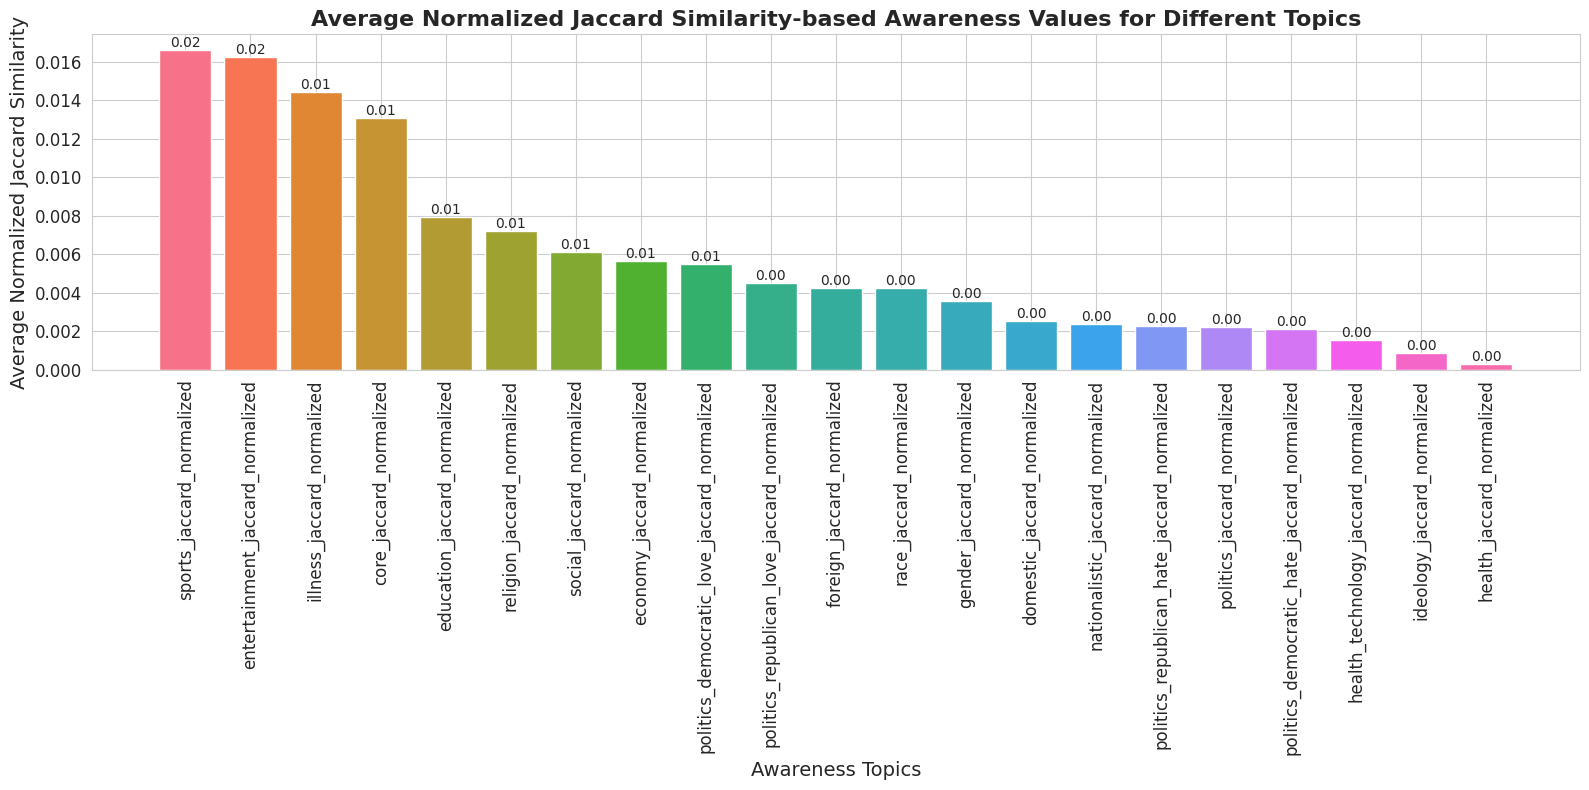

In [6]:
# Sort the average values in descending order
sorted_average_jaccard_normalized = average_jaccard_normalized.sort_values(ascending=False)

# Set the style for the plot
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create a bar chart with customizations
plt.figure(figsize=(16, 8))
bar_plot = plt.bar(sorted_average_jaccard_normalized.index, sorted_average_jaccard_normalized.values, color=sns.color_palette("husl", len(sorted_average_jaccard_normalized)))
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Awareness Topics", fontsize=14)
plt.ylabel("Average Normalized Jaccard Similarity", fontsize=14)
plt.title("Average Normalized Jaccard Similarity-based Awareness Values for Different Topics", fontsize=16, fontweight='bold')

# Add value labels to the bars
for rect in bar_plot:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f"{height:.2f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

<b>Interpretation:</b>  
1. The bar chart shows average normalized Jaccard similarity values for various awareness topics. 
2. Sports and entertainment have the highest values, indicating a higher level of awareness in these areas. In contrast, health, ideology, and health technology have the lowest values, suggesting lower awareness levels. 
3. The remaining topics, such as education, religion, and economy, have moderate awareness levels. 
4. It's worth noting that political topics show a slightly higher awareness for Democratic and Republican love compared to hate, but overall, the awareness levels for politics are not as high as sports and entertainment.

###(C)

In [7]:
import matplotlib.pyplot as plt
# Calculate the mean awareness value for each county
meanval = train_data.groupby('county')['core_jaccard_normalized'].mean()
#Since the bar is from high to low, we will  sort it in descending order
meanval=meanval.sort_values(ascending= False)
meanval

county
Delaware     0.038117
Richland     0.036633
Perry        0.032577
Clermont     0.031629
Medina       0.028693
               ...   
Hocking      0.000000
Holmes       0.000000
Champaign    0.000000
Highland     0.000000
Paulding     0.000000
Name: core_jaccard_normalized, Length: 88, dtype: float64

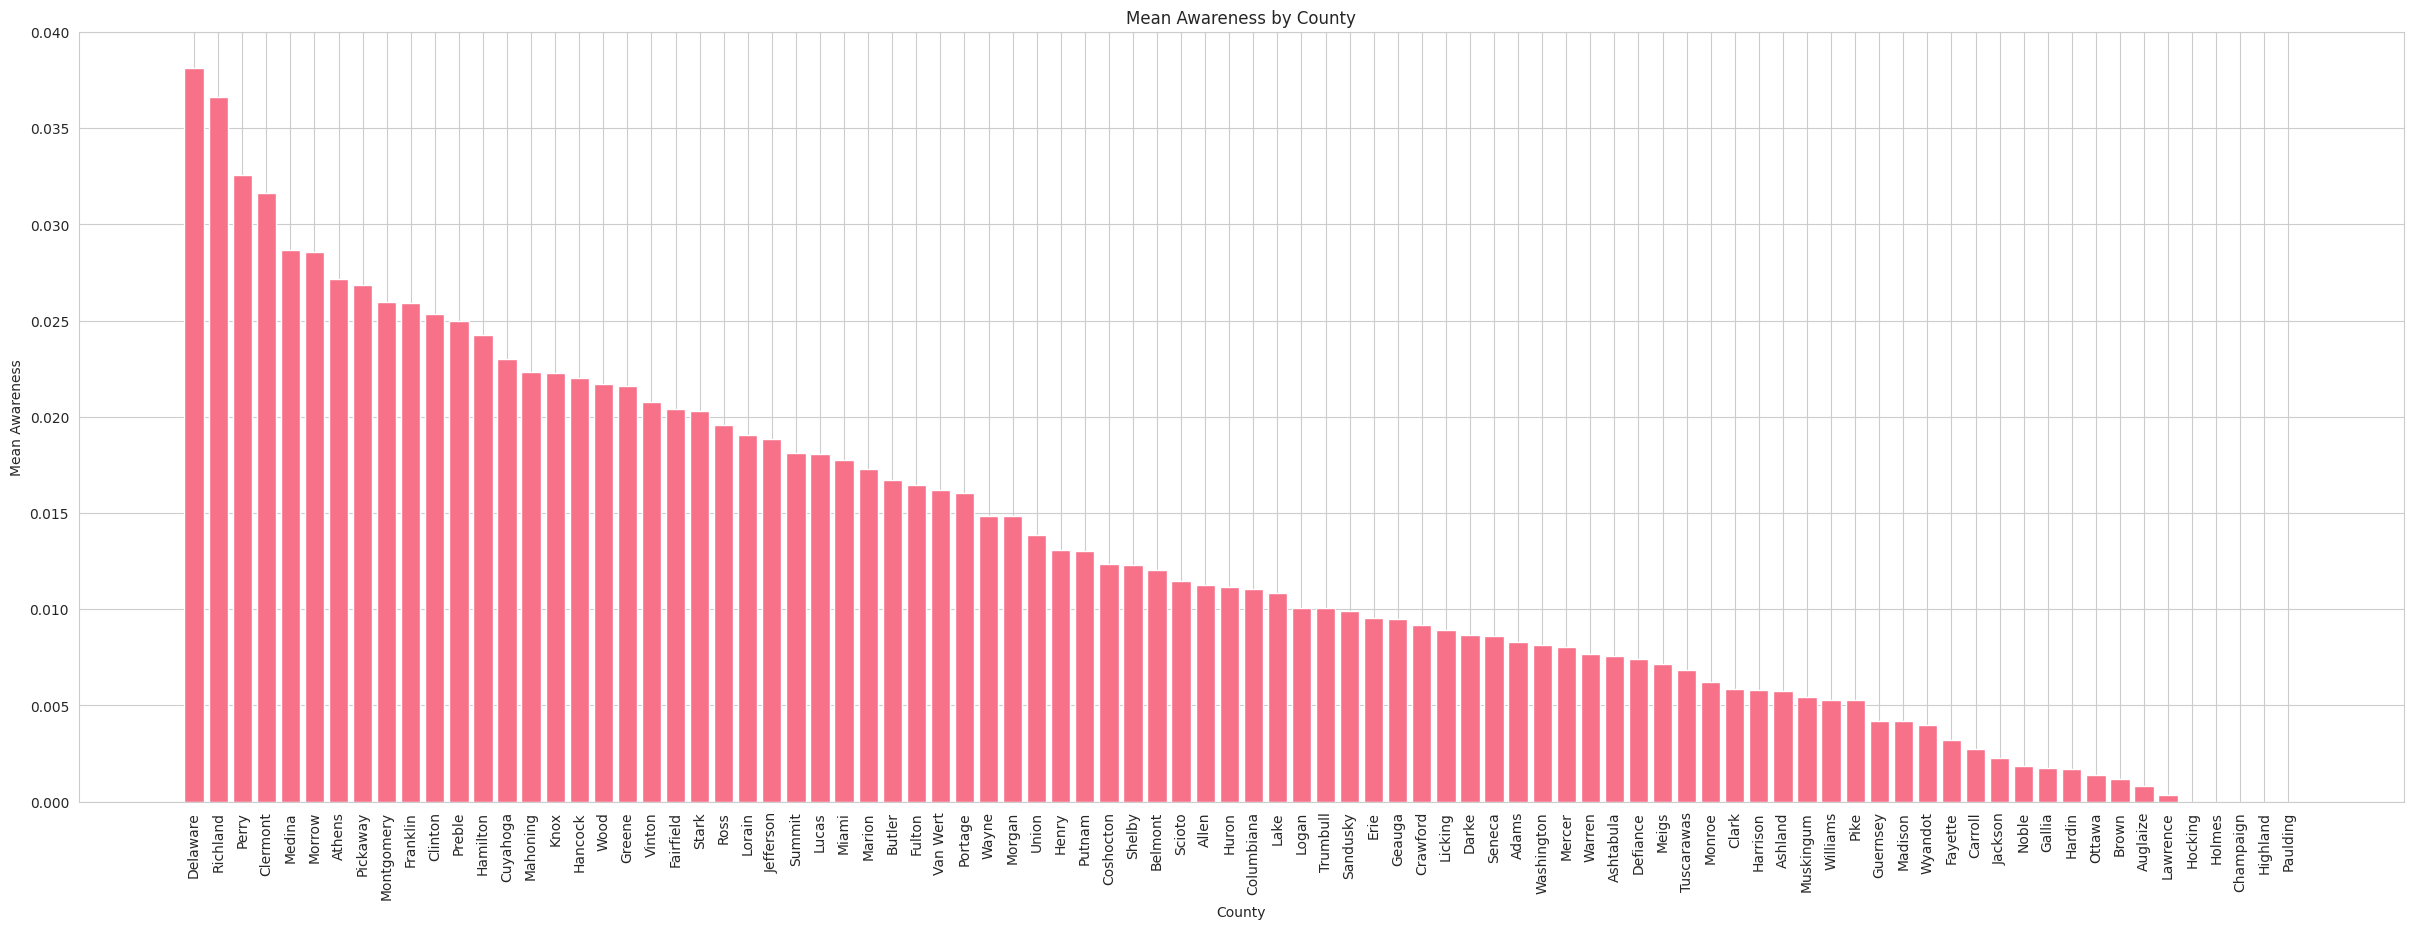

In [8]:
#creating the bar chart
plt.figure(figsize=(30,10))
plt.bar(meanval.index, meanval.values)
plt.title('Mean Awareness by County')
plt.xlabel('County')
plt.ylabel('Mean Awareness')
plt.xticks(rotation=90)
plt.show()

####Interpretation
##### Delaware has the highest mean awareness with a value of 0.038 followed by Richland and Perry and Paulding has the lowest mean awareness. Therefore, it had the highest level of awareness amongst its residents. This is also reflected by the number of cases which remain 0 till day 75. However, after that there is a sharp increase in the number of cases. On the pother hand, even though the mean awareness of Paulding is the least, it has the 0 cases and 0 deaths till day 94. One of the reasons for it could be the population and the size of the county. 

###(D)

In [199]:
import geopandas as gpd

In [197]:
# Read the data
train_data = pd.read_csv("training_data.csv")

# Calculate average cases and deaths per capita for each county
train_data['cases_per_capita'] = train_data['cases'] / train_data['total_pop']
train_data['deaths_per_capita'] = train_data['deaths'] / train_data['total_pop']
county_data = train_data.groupby('county').agg({'cases_per_capita': 'mean', 'deaths_per_capita': 'mean'}).reset_index()

In [200]:
# Load Ohio county shapefile
# ohio_shapefile = gpd.read_file(""D:\Spring 2023\Statistical ML\HW\Kaggle Problem 1\tl_2022_39_cousub"")
ohio_shapefile = gpd.read_file("D:\\Spring 2023\\Statistical ML\\HW\\Kaggle Problem 1\\tl_2022_39_cousub")
ohio_shapefile = ohio_shapefile.merge(county_data, left_on="NAME", right_on="county")

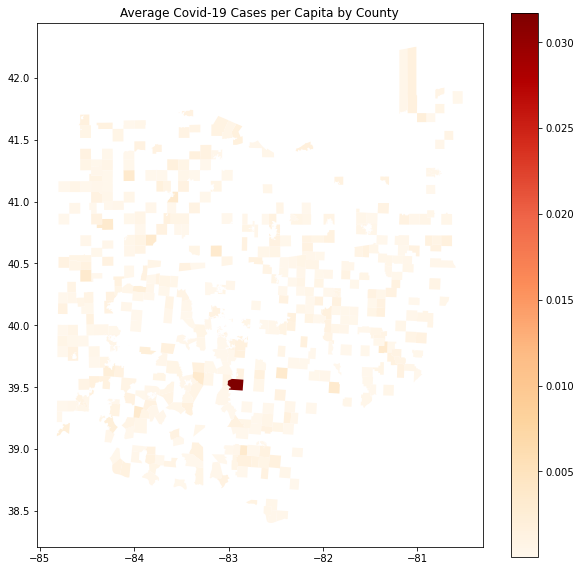

In [205]:
# Plot average cases per capita by county
fig, ax = plt.subplots(figsize=(10, 10))
ohio_shapefile.plot(column='cases_per_capita', cmap='OrRd', legend=True, ax=ax)
ax.set_title("Average Covid-19 Cases per Capita by County")
plt.show()

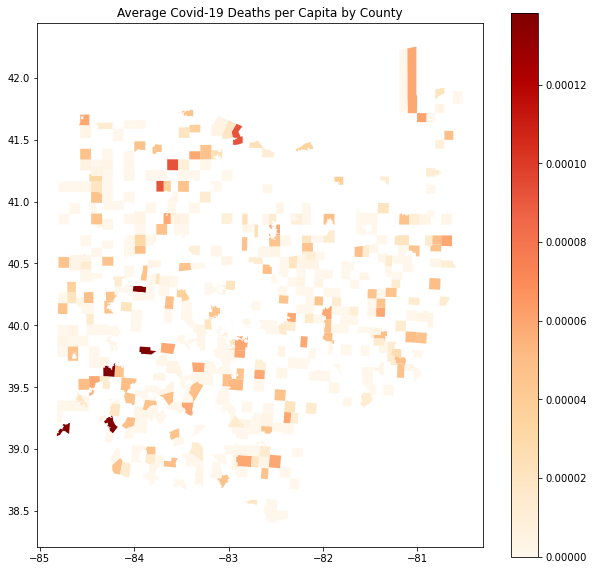

In [202]:
# Plot average deaths per capita by county
fig, ax = plt.subplots(figsize=(10, 10))
ohio_shapefile.plot(column='deaths_per_capita', cmap='OrRd', legend=True, ax=ax)
ax.set_title("Average Covid-19 Deaths per Capita by County")
plt.show()

In [203]:
# Top-5 counties with high number of per capita cases
top5_cases = county_data.nlargest(5, 'cases_per_capita')
print("Top-5 counties with high number of per capita cases:\n", top5_cases['county'].tolist())

Top-5 counties with high number of per capita cases:
 ['Pickaway', 'Marion', 'Lucas', 'Columbiana', 'Mahoning']


In [204]:
# Top-5 counties with high number of per capita deaths
top5_deaths = county_data.nlargest(5, 'deaths_per_capita')
print("Top-5 counties with high number of per capita deaths:\n", top5_deaths['county'].tolist())

Top-5 counties with high number of per capita deaths:
 ['Miami', 'Darke', 'Columbiana', 'Portage', 'Mahoning']


###(E)

In [9]:
# Select normalized Jaccard similarity-based awareness columns
jaccard_normalized_columns = [col for col in train_data.columns if "jaccard_normalized" in col]

# Group the data by date and calculate the average values for each day
grouped_by_date = train_data.groupby("date_index_converted")[jaccard_normalized_columns].mean()

In [10]:
grouped_by_date_df = pd.DataFrame(grouped_by_date)
grouped_by_date_df

,core_jaccard_normalized,ideology_jaccard_normalized,race_jaccard_normalized,economy_jaccard_normalized,sports_jaccard_normalized,foreign_jaccard_normalized,domestic_jaccard_normalized,nationalistic_jaccard_normalized,politics_democratic_love_jaccard_normalized,health_technology_jaccard_normalized,...,gender_jaccard_normalized,religion_jaccard_normalized,social_jaccard_normalized,politics_republican_love_jaccard_normalized,politics_jaccard_normalized,entertainment_jaccard_normalized,politics_republican_hate_jaccard_normalized,politics_democratic_hate_jaccard_normalized,health_jaccard_normalized,illness_jaccard_normalized
date_index_converted,,,,,,,,,,,,,,,,,,,,,
day_1,0.000007,0.000208,0.000000,0.006211,0.010840,0.000426,0.002583,0.004060,0.016869,0.001186,...,0.000573,0.007803,0.003742,0.004655,0.000438,0.005994,0.000333,0.000041,0.000000,0.000663
day_10,0.000009,0.000000,0.004031,0.003062,0.011934,0.009096,0.004700,0.002584,0.001060,0.000710,...,0.001686,0.002387,0.002732,0.002286,0.002273,0.015188,0.001415,0.000430,0.000264,0.000009
day_100,0.056916,0.000000,0.001745,0.008574,0.005350,0.000054,0.005350,0.000293,0.002707,0.002664,...,0.000000,0.008436,0.016484,0.003317,0.000467,0.011967,0.003015,0.003748,0.000349,0.020615
day_101,0.019152,0.000000,0.000064,0.003945,0.003130,0.001402,0.003132,0.000925,0.003992,0.001359,...,0.000695,0.007727,0.008185,0.003885,0.002048,0.023039,0.004032,0.000276,0.000000,0.023934
day_102,0.013422,0.000000,0.000000,0.005028,0.005078,0.002967,0.001890,0.001726,0.004366,0.001432,...,0.012348,0.006229,0.010817,0.000812,0.000683,0.024331,0.002383,0.000545,0.000000,0.017074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
day_95,0.026346,0.000000,0.000000,0.003078,0.026104,0.007660,0.005637,0.002261,0.000899,0.001688,...,0.001913,0.003473,0.010558,0.002381,0.001168,0.018681,0.005620,0.000158,0.000000,0.021075
day_96,0.040004,0.000000,0.001495,0.003569,0.032880,0.005882,0.002681,0.004907,0.000605,0.002087,...,0.000159,0.009754,0.011125,0.000968,0.001245,0.023066,0.003369,0.000100,0.000000,0.029547
day_97,0.032443,0.019635,0.000048,0.006629,0.021680,0.004339,0.002074,0.000551,0.001618,0.003459,...,0.002240,0.006412,0.010762,0.003271,0.001031,0.013181,0.001578,0.000307,0.000000,0.038476


In [11]:
grouped_by_date_dict = grouped_by_date.to_dict()
# Load the data
train_data = pd.read_csv("training_data.csv")

# Get the number of unique dates
num_days = train_data["date_index_converted"].nunique()

print(f"Total number of days in the dataset: {num_days}")

Total number of days in the dataset: 119


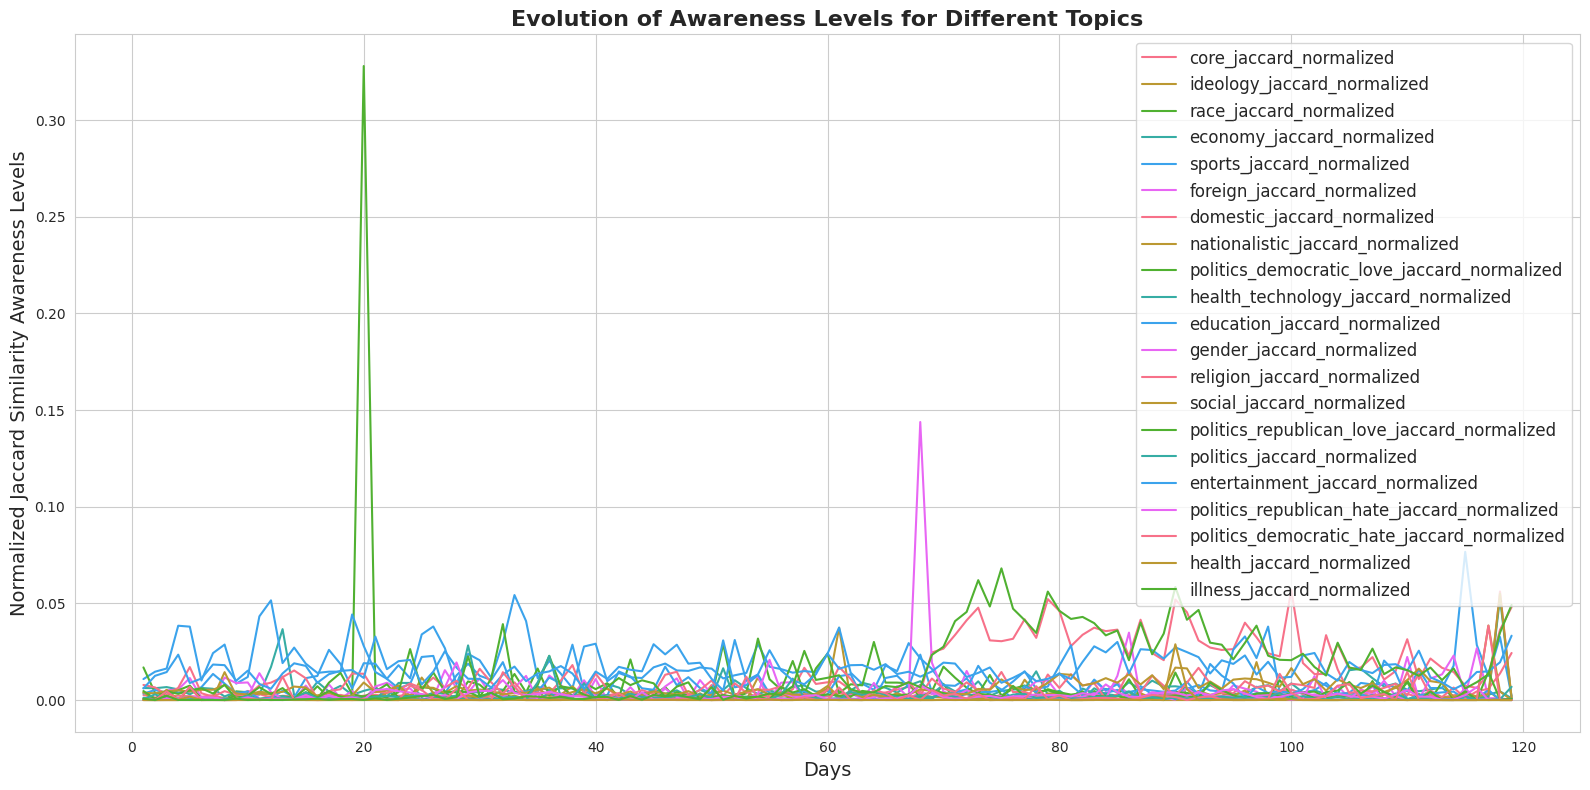

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
train_data = pd.read_csv("training_data.csv")

# Extract the day number from the "date_index_converted" column
train_data["day_number"] = train_data["date_index_converted"].str.replace("day_", "").astype(int)

# Select normalized Jaccard similarity-based awareness columns
jaccard_normalized_columns = [col for col in train_data.columns if "jaccard_normalized" in col]

# Group the data by day number and calculate the average values for each day
grouped_by_day = train_data.groupby("day_number")[jaccard_normalized_columns].mean()

# Create a line chart
plt.figure(figsize=(16, 8))
for col in grouped_by_day.columns:
    plt.plot(grouped_by_day.index, grouped_by_day[col], label=col)

plt.xlabel("Days", fontsize=14)
plt.ylabel("Normalized Jaccard Similarity Awareness Levels", fontsize=14)
plt.title("Evolution of Awareness Levels for Different Topics", fontsize=16, fontweight='bold')

plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

In [13]:
# Find the days when race_jaccard_normalized, sports_jaccard_normalized, and gender_jaccard_normalized have the largest values
largest_race_day = grouped_by_day["race_jaccard_normalized"].idxmax()
largest_sports_day = grouped_by_day["sports_jaccard_normalized"].idxmax()
largest_gender_day = grouped_by_day["gender_jaccard_normalized"].idxmax()

print(f"Largest race_jaccard_normalized value on day: {largest_race_day}")
print(f"Largest sports_jaccard_normalized value on day: {largest_sports_day}")
print(f"Largest gender_jaccard_normalized value on day: {largest_gender_day}")

Largest race_jaccard_normalized value on day: 20
Largest sports_jaccard_normalized value on day: 115
Largest gender_jaccard_normalized value on day: 68


<b>Interpretation:</b>  

After analyzing the line chart of the evolution of awareness levels for different topics, we can draw the following conclusions:

  race_jaccard_normalized received the highest awareness on day 20, followed by gender_jaccard_normalized on day 68 and    sports_jaccard_normalized on day 115 reflecting the highest level of similarity in terms of race-based discussions, showing the greatest similarity in conversations about sports, and demonstrating the highest level of similarity in gender-focused discussions respectively.

#  <center> The End